In [31]:
#Import necessory libraries
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [32]:
data=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/Automobile_insurance_fraud.csv")

In [33]:
#Lets load datahead
data.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [34]:
#Lets check the shape of the dataset
data.shape

(1000, 40)

In [35]:
#Lets check for isnull
data.isna().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

We can see that we have one unecessory  Column _c39    its have all nan values we have to delete the column because its not contributing any thing for prediction

In [36]:
data.drop(columns='_c39',inplace=True)

In [37]:
#Lets Check for datatype of the dataset
data.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

we have 19 numerical and 21 object column

In [38]:
# printing all data type and their unique values
for column in data.columns:
    if data[column].dtype==object:
        print(data[column].value_counts())
        print('==========================================================')

01-01-2006    3
28-04-1992    3
05-08-1992    3
14-12-1991    2
09-08-2004    2
             ..
03-06-2014    1
12-12-1998    1
18-02-1999    1
30-10-1997    1
11-11-1996    1
Name: policy_bind_date, Length: 951, dtype: int64
OH    352
IL    338
IN    310
Name: policy_state, dtype: int64
250/500     351
100/300     349
500/1000    300
Name: policy_csl, dtype: int64
FEMALE    537
MALE      463
Name: insured_sex, dtype: int64
JD             161
High School    160
Associate      145
MD             144
Masters        143
PhD            125
College        122
Name: insured_education_level, dtype: int64
machine-op-inspct    93
prof-specialty       85
tech-support         78
sales                76
exec-managerial      76
craft-repair         74
transport-moving     72
other-service        71
priv-house-serv      71
armed-forces         69
adm-clerical         65
protective-serv      63
handlers-cleaners    54
farming-fishing      53
Name: insured_occupation, dtype: int64
reading           64

In [39]:
# replacing '?' with No info
data=data.replace('?','Nan')

some of the rows are having ? sign replacing them with No info

In [40]:
# printing all data type and their unique values
for column in data.columns:
    if data[column].dtype==object:
        print(data[column].value_counts())
        print('==========================================================')

01-01-2006    3
28-04-1992    3
05-08-1992    3
14-12-1991    2
09-08-2004    2
             ..
03-06-2014    1
12-12-1998    1
18-02-1999    1
30-10-1997    1
11-11-1996    1
Name: policy_bind_date, Length: 951, dtype: int64
OH    352
IL    338
IN    310
Name: policy_state, dtype: int64
250/500     351
100/300     349
500/1000    300
Name: policy_csl, dtype: int64
FEMALE    537
MALE      463
Name: insured_sex, dtype: int64
JD             161
High School    160
Associate      145
MD             144
Masters        143
PhD            125
College        122
Name: insured_education_level, dtype: int64
machine-op-inspct    93
prof-specialty       85
tech-support         78
sales                76
exec-managerial      76
craft-repair         74
transport-moving     72
other-service        71
priv-house-serv      71
armed-forces         69
adm-clerical         65
protective-serv      63
handlers-cleaners    54
farming-fishing      53
Name: insured_occupation, dtype: int64
reading           64

In [41]:
#Lets Describe the dataset
data.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000


In [42]:
data['umbrella_limit'].value_counts()

 0           798
 6000000      57
 5000000      46
 4000000      39
 7000000      29
 3000000      12
 8000000       8
 9000000       5
 2000000       3
 10000000      2
-1000000       1
Name: umbrella_limit, dtype: int64

we can see there is one row in negative value must be the mistake or not sure droping the row

In [43]:
data.loc[data['umbrella_limit']== -1000000]

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
290,284,42,526039,04-05-1995,OH,100/300,500,1338.54,-1000000,438178,...,1,Nan,94160,8560,17120,68480,Chevrolet,Malibu,1996,N


In [44]:
# dividing ['incident_date] into three other columns
data['incident_Date']=data['incident_date'].str.split('-').str[0]
data['incident_Month']=data['incident_date'].str.split('-').str[1]
data['incident_Year']=data['incident_date'].str.split('-').str[2]

In [45]:
# in incident data all the incident is from 2015 so dropping the incident_year
data['incident_Year'].value_counts()
data.drop('incident_Year',axis=1,inplace=True)

In [46]:
# dividing policy_bind_date into three other columns
data['policy_bind_Date']=data['policy_bind_date'].str.split('-').str[0]
data['policy_bind_Month']=data['policy_bind_date'].str.split('-').str[1]
data['policy_bind_Year']=data['policy_bind_date'].str.split('-').str[2]

# dropping policy_bind_date  column
data.drop('policy_bind_date',axis=1,inplace=True)

In [47]:
data.head()

,months_as_customer,age,policy_number,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,incident_Date,incident_Month,policy_bind_Date,policy_bind_Month,policy_bind_Year
0,328,48,521585,OH,250/500,1000,1406.91,0,466132,MALE,...,52080,Saab,92x,2004,Y,25,01,17,10,2014
1,228,42,342868,IN,250/500,2000,1197.22,5000000,468176,MALE,...,3510,Mercedes,E400,2007,Y,21,01,27,06,2006
2,134,29,687698,OH,100/300,2000,1413.14,5000000,430632,FEMALE,...,23100,Dodge,RAM,2007,N,22,02,06,09,2000
3,256,41,227811,IL,250/500,2000,1415.74,6000000,608117,FEMALE,...,50720,Chevrolet,Tahoe,2014,Y,10,01,25,05,1990
4,228,44,367455,IL,500/1000,1000,1583.91,6000000,610706,MALE,...,4550,Accura,RSX,2009,N,17,02,06,06,2014


In [48]:
# dropping the policy_number  and  other useless columns as well
data.drop(['policy_number','insured_zip','incident_location'],axis=1,inplace=True)

In [49]:
data.head()

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,...,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,incident_Date,incident_Month,policy_bind_Date,policy_bind_Month,policy_bind_Year
0,328,48,OH,250/500,1000,1406.91,0,MALE,MD,craft-repair,...,52080,Saab,92x,2004,Y,25,01,17,10,2014
1,228,42,IN,250/500,2000,1197.22,5000000,MALE,MD,machine-op-inspct,...,3510,Mercedes,E400,2007,Y,21,01,27,06,2006
2,134,29,OH,100/300,2000,1413.14,5000000,FEMALE,PhD,sales,...,23100,Dodge,RAM,2007,N,22,02,06,09,2000
3,256,41,IL,250/500,2000,1415.74,6000000,FEMALE,PhD,armed-forces,...,50720,Chevrolet,Tahoe,2014,Y,10,01,25,05,1990
4,228,44,IL,500/1000,1000,1583.91,6000000,MALE,Associate,sales,...,4550,Accura,RSX,2009,N,17,02,06,06,2014


In [50]:
data.shape

(1000, 40)

In [52]:
data['fraud_reported'].value_counts()

N    753
Y    247
Name: fraud_reported, dtype: int64

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<AxesSubplot:xlabel='fraud_reported', ylabel='count'>

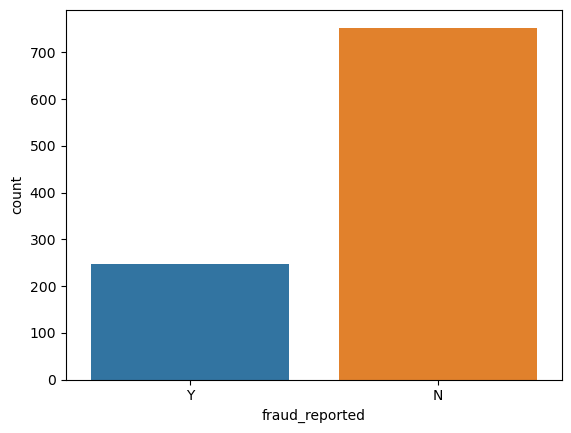

In [56]:
sns.countplot(data['fraud_reported'])

we can notice data is imbalance we have to deal with

In [58]:
data.head()

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,...,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,incident_Date,incident_Month,policy_bind_Date,policy_bind_Month,policy_bind_Year
0,328,48,OH,250/500,1000,1406.91,0,MALE,MD,craft-repair,...,52080,Saab,92x,2004,Y,25,01,17,10,2014
1,228,42,IN,250/500,2000,1197.22,5000000,MALE,MD,machine-op-inspct,...,3510,Mercedes,E400,2007,Y,21,01,27,06,2006
2,134,29,OH,100/300,2000,1413.14,5000000,FEMALE,PhD,sales,...,23100,Dodge,RAM,2007,N,22,02,06,09,2000
3,256,41,IL,250/500,2000,1415.74,6000000,FEMALE,PhD,armed-forces,...,50720,Chevrolet,Tahoe,2014,Y,10,01,25,05,1990
4,228,44,IL,500/1000,1000,1583.91,6000000,MALE,Associate,sales,...,4550,Accura,RSX,2009,N,17,02,06,06,2014


<AxesSubplot:xlabel='fraud_reported', ylabel='total_claim_amount'>

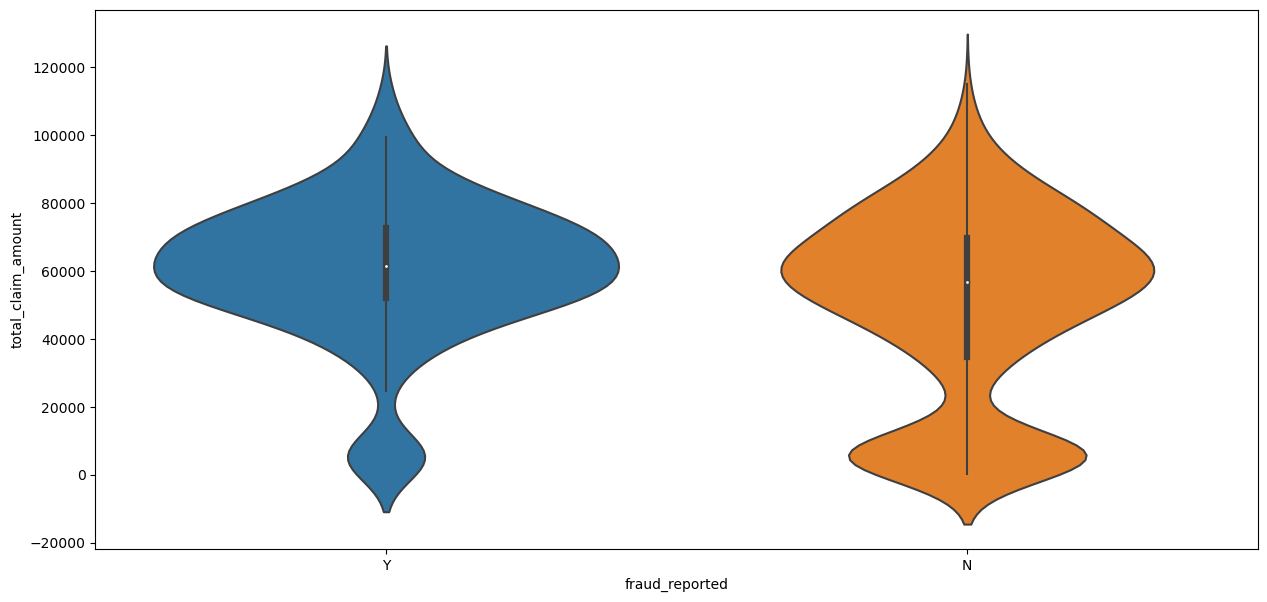

In [60]:
plt.figure(figsize=(15, 7))
sns.violinplot(y='total_claim_amount',x='fraud_reported',data=data)

Most of fraud reported found where total claimed amount 50000 to 70000

<AxesSubplot:xlabel='number_of_vehicles_involved', ylabel='count'>

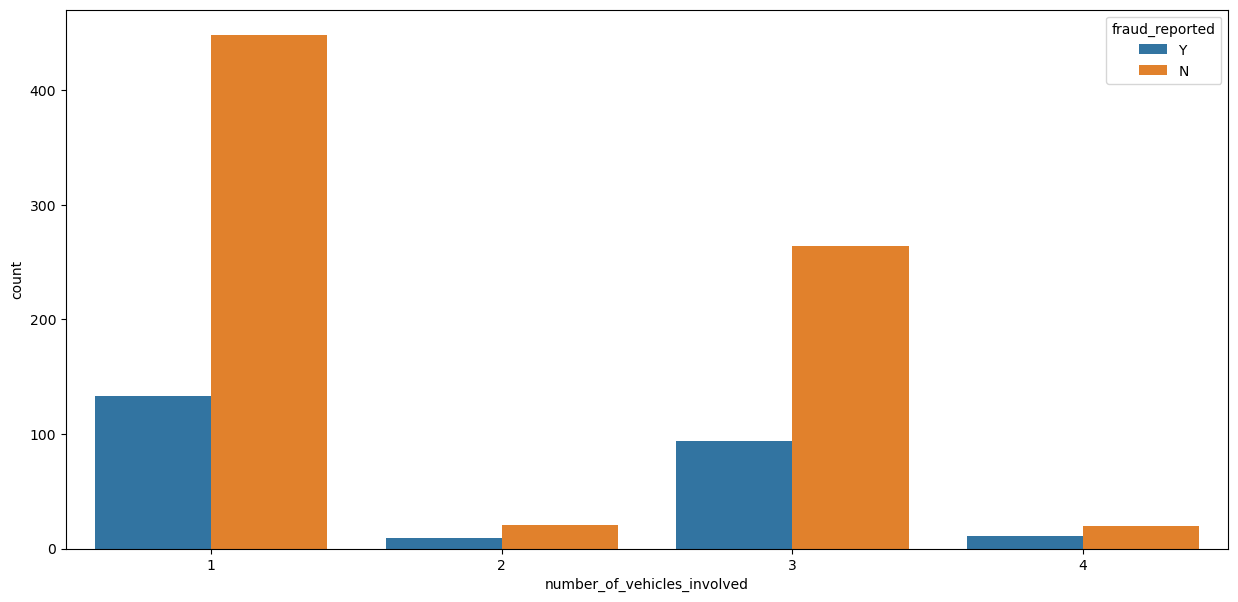

In [61]:
plt.figure(figsize=(15, 7))
sns.countplot(x='number_of_vehicles_involved',hue='fraud_reported',data=data)

most of fraud report were found where number_of_vehicles_involved more than 1

<AxesSubplot:xlabel='incident_city', ylabel='count'>

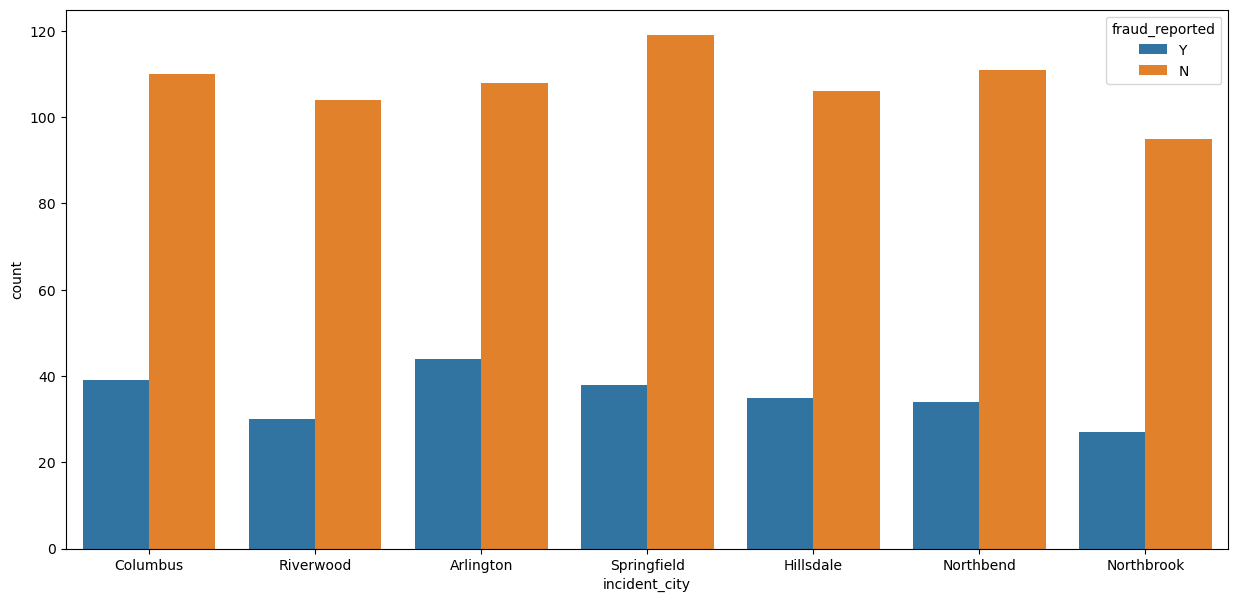

In [62]:
plt.figure(figsize=(15, 7))
sns.countplot(x='incident_city',hue='fraud_reported',data=data)

In all cities fraud reported count are almost same



<AxesSubplot:xlabel='incident_state', ylabel='count'>

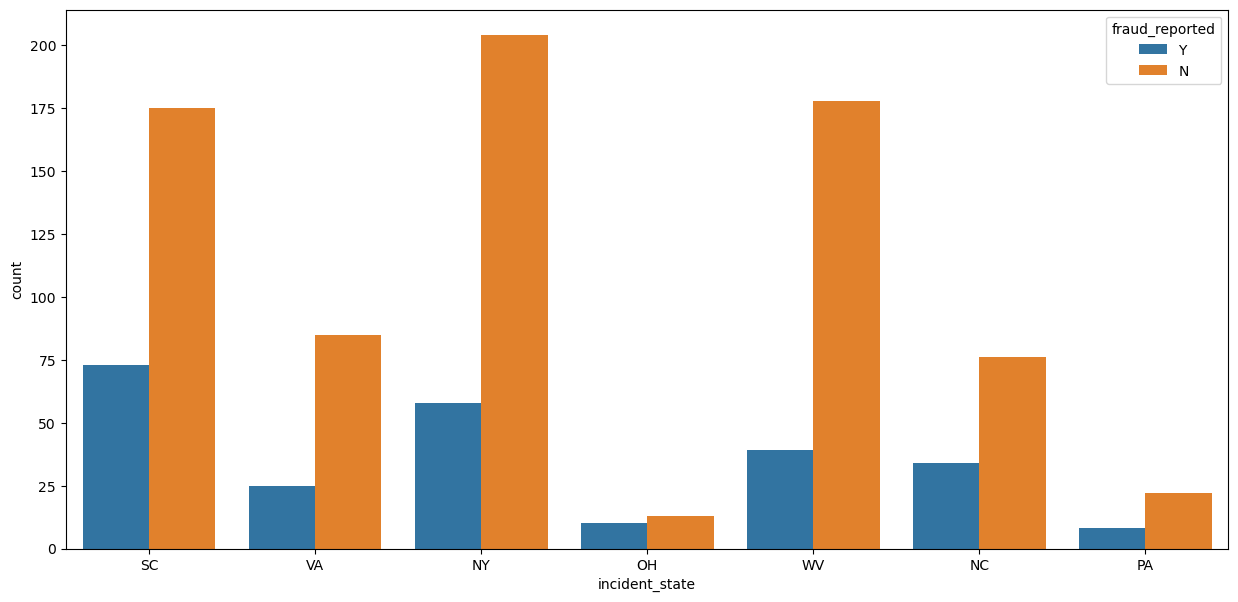

In [63]:
plt.figure(figsize=(15, 7))
sns.countplot(x='incident_state',hue='fraud_reported',data=data)


Most of fraud reported were found where incident state was SC, NY, OH, NC AND PA

<AxesSubplot:xlabel='authorities_contacted', ylabel='count'>

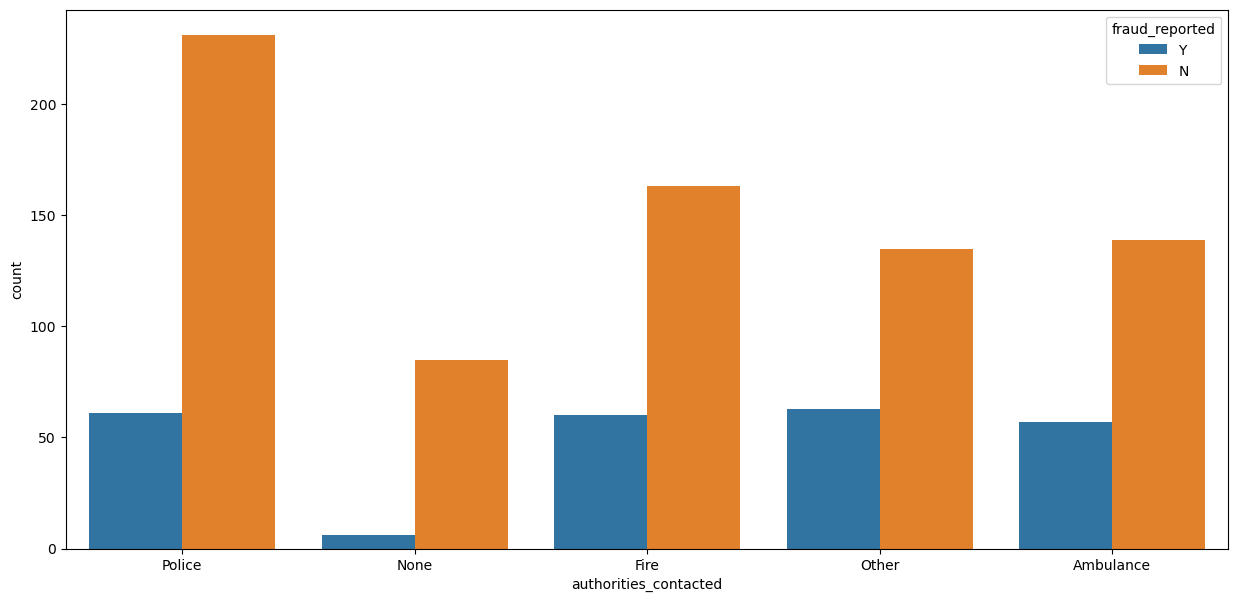

In [64]:
plt.figure(figsize=(15, 7))
sns.countplot(x='authorities_contacted',hue='fraud_reported',data=data)

most of fraud founded where cx have contacted authorities_contacted of Fire, Other and Ambulance

<AxesSubplot:xlabel='incident_severity', ylabel='count'>

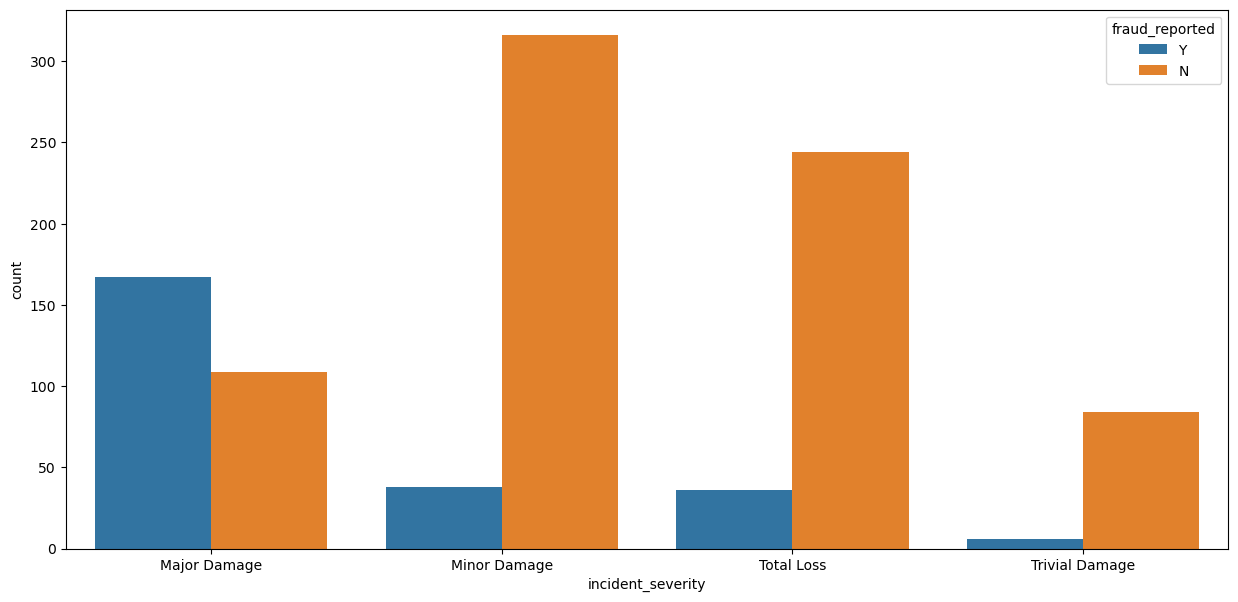

In [66]:
plt.figure(figsize=(15, 7))
sns.countplot(x='incident_severity',hue='fraud_reported',data=data)

Most of fraud reported claim are Major Damage, most of them are counted as Fraud, there are very fraud report in Trivial damage

<AxesSubplot:xlabel='collision_type', ylabel='count'>

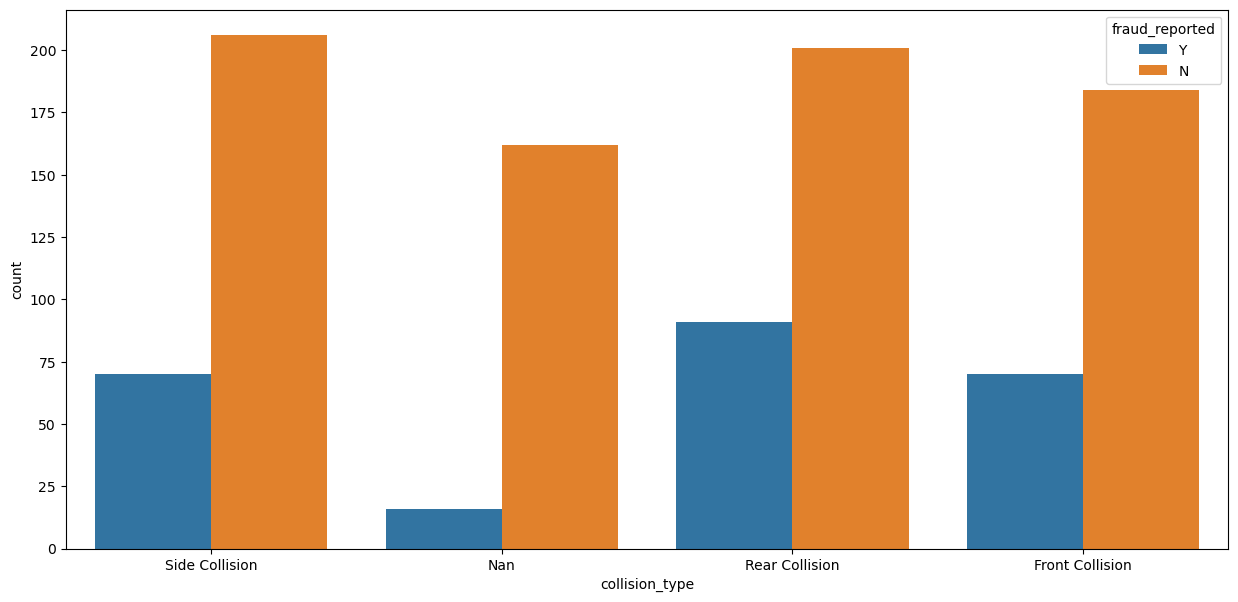

In [68]:
plt.figure(figsize=(15, 7))
sns.countplot(x='collision_type',hue='fraud_reported',data=data)

most of fraud reported claims in Side Collision, Rear Collision and Front Collision, some of reported claim we have those are in no info of collision type

<AxesSubplot:xlabel='incident_type', ylabel='count'>

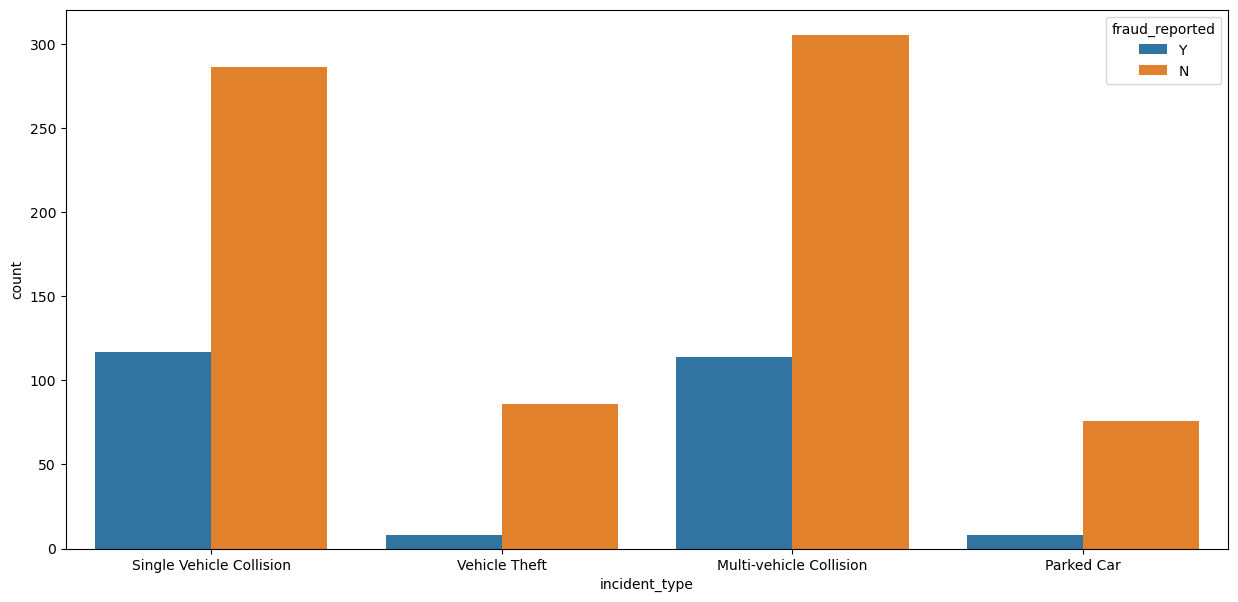

In [69]:
plt.figure(figsize=(15, 7))
sns.countplot(x='incident_type',hue='fraud_reported',data=data)

we have most claim reported and fraud reported in Single vehicle collision and multi-vehicle collision incident type. In other two incident type vehicle theft and parked car are very less fraud report

<AxesSubplot:xlabel='incident_Month', ylabel='count'>

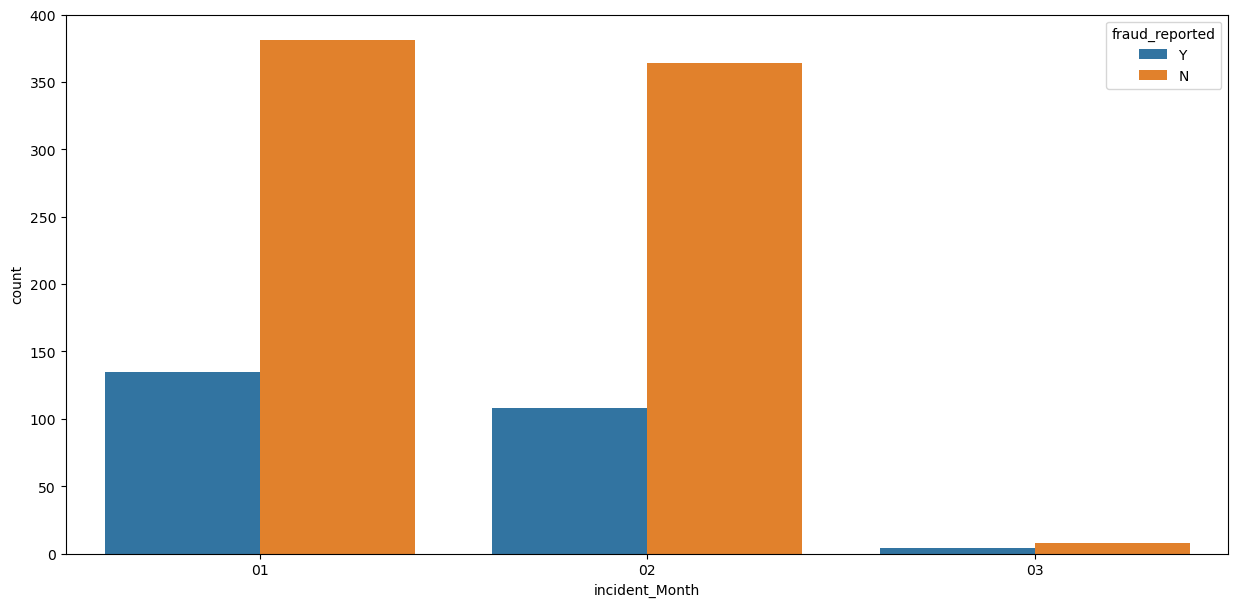

In [71]:
plt.figure(figsize=(15, 7))
sns.countplot(x='incident_Month',hue='fraud_reported',data=data)

most of the data we have reported in month 1 and 2 fraud reported are also around same in both months

<AxesSubplot:xlabel='fraud_reported', ylabel='capital-loss'>

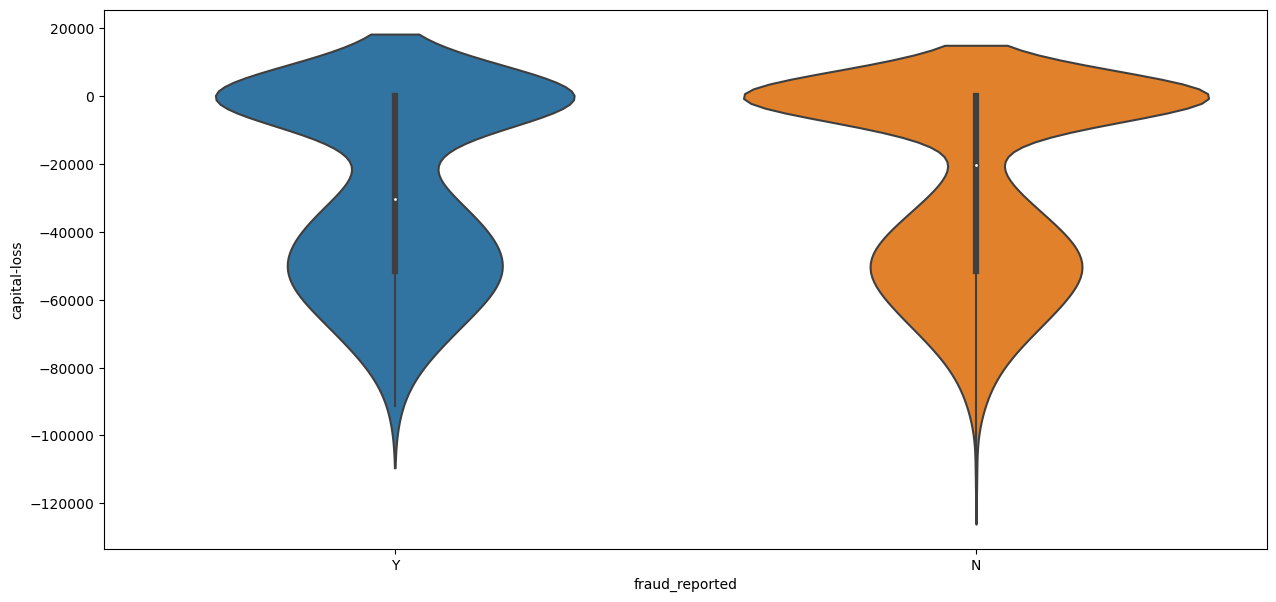

In [72]:
plt.figure(figsize=(15, 7))
sns.violinplot(y='capital-loss',x='fraud_reported',data=data)

most of fraud reported we see in cx those capital loss are and -40000 to -60000

<AxesSubplot:xlabel='fraud_reported', ylabel='capital-gains'>

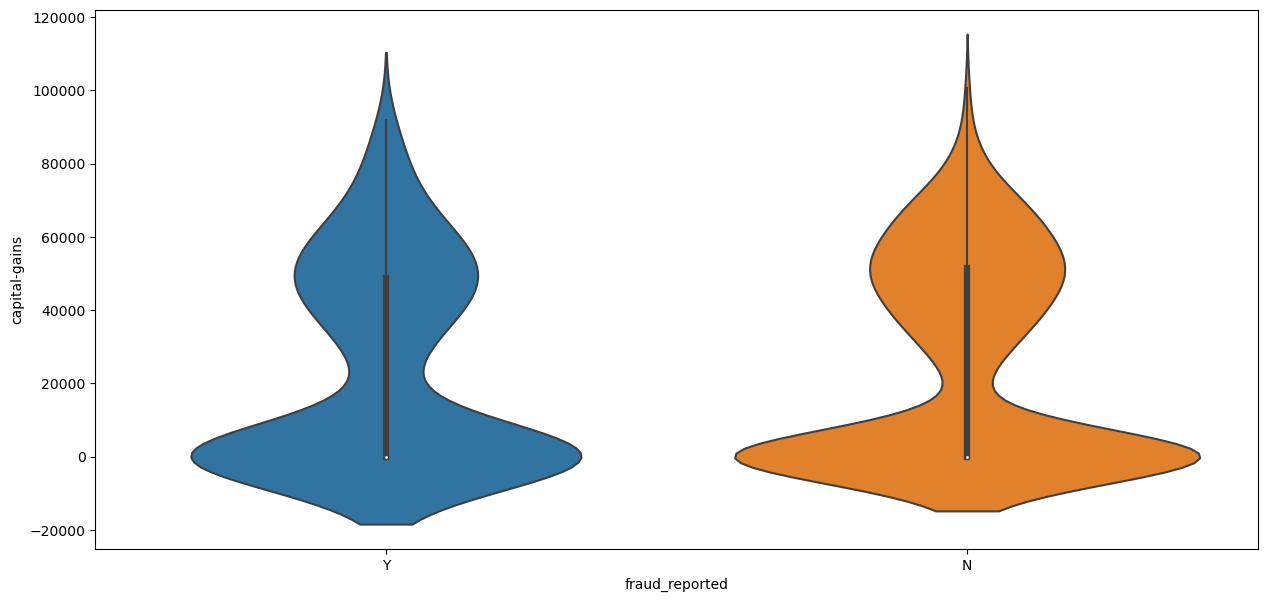

In [73]:
plt.figure(figsize=(15, 7))
sns.violinplot(y='capital-gains',x='fraud_reported',data=data)

most of the fraud reported are in cx those capital gains are 0 and around 50000

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'husband'),
  Text(1, 0, 'other-relative'),
  Text(2, 0, 'own-child'),
  Text(3, 0, 'unmarried'),
  Text(4, 0, 'wife'),
  Text(5, 0, 'not-in-family')])

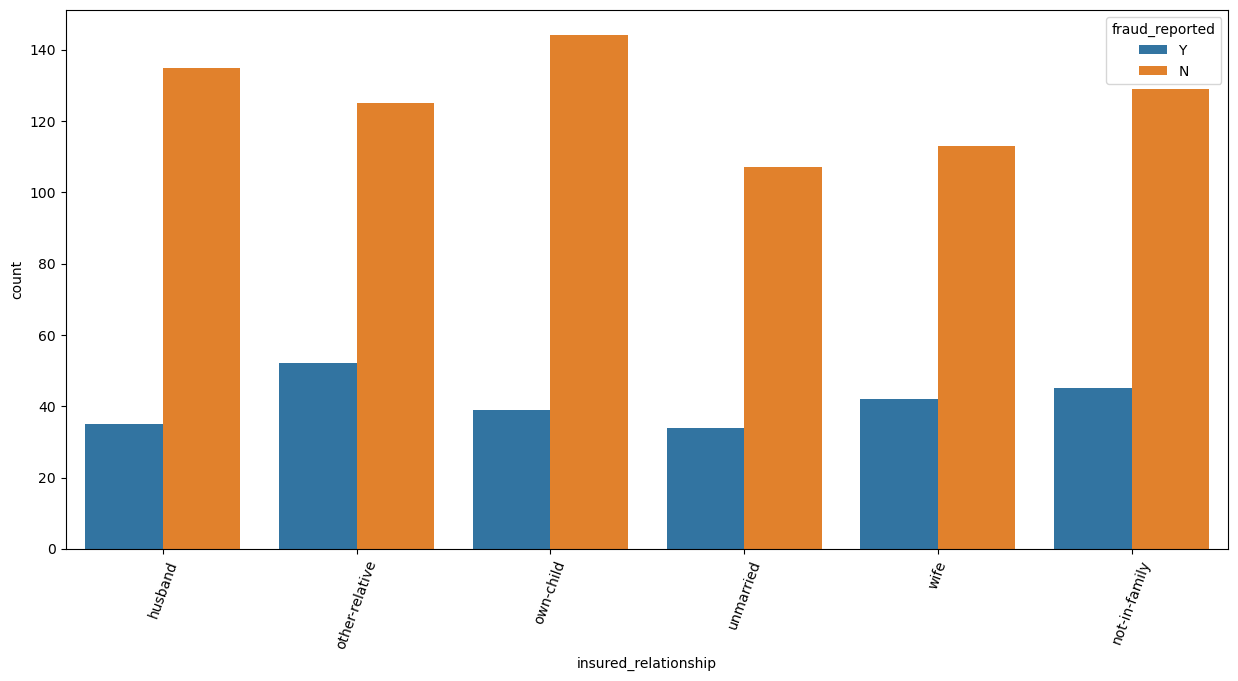

In [74]:
plt.figure(figsize=(15, 7))
sns.countplot(x='insured_relationship',hue='fraud_reported',data=data)
plt.xticks(rotation=70)

according the data info, cx those having insured relationship with other relative and wife are most reported than others

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'sleeping'),
  Text(1, 0, 'reading'),
  Text(2, 0, 'board-games'),
  Text(3, 0, 'bungie-jumping'),
  Text(4, 0, 'base-jumping'),
  Text(5, 0, 'golf'),
  Text(6, 0, 'camping'),
  Text(7, 0, 'dancing'),
  Text(8, 0, 'skydiving'),
  Text(9, 0, 'movies'),
  Text(10, 0, 'hiking'),
  Text(11, 0, 'yachting'),
  Text(12, 0, 'paintball'),
  Text(13, 0, 'chess'),
  Text(14, 0, 'kayaking'),
  Text(15, 0, 'polo'),
  Text(16, 0, 'basketball'),
  Text(17, 0, 'video-games'),
  Text(18, 0, 'cross-fit'),
  Text(19, 0, 'exercise')])

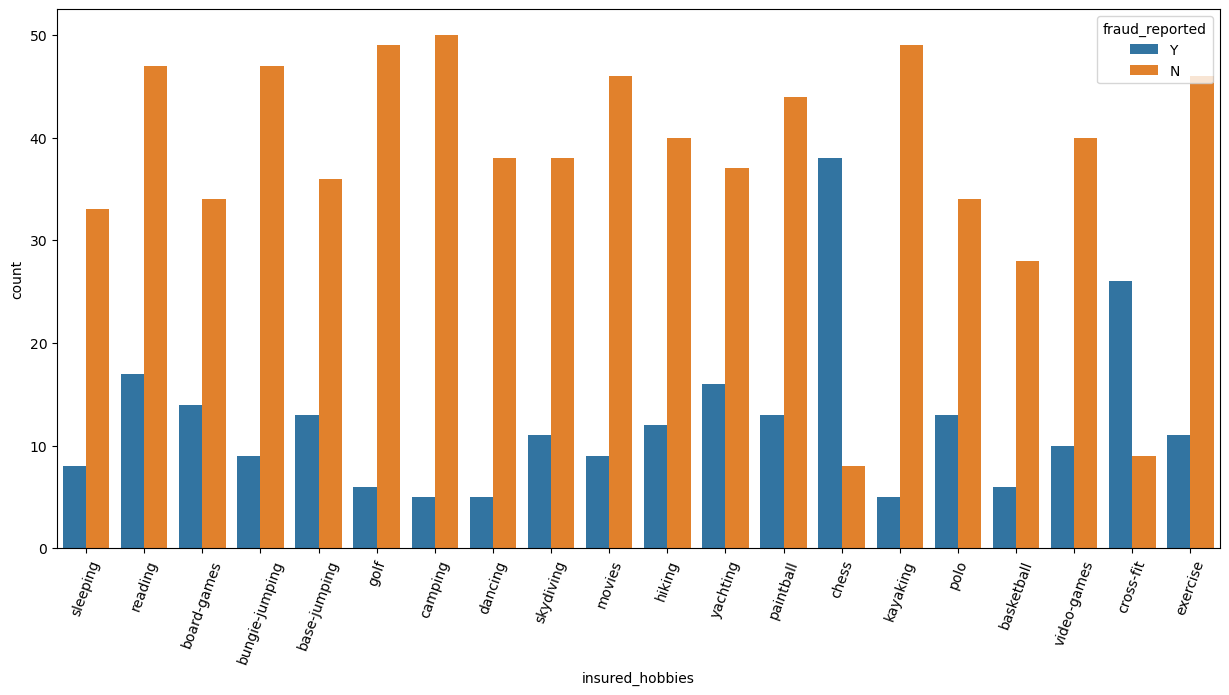

In [75]:
plt.figure(figsize=(15, 7))
sns.countplot(x='insured_hobbies',hue='fraud_reported',data=data)
plt.xticks(rotation=70)

Here we can see the cx those hobbies are Chess, are most fraud reported cx

Here we can see the cx those hobbies are cross-fit, are also most fraud reported cx

after that cx those hobbies are reading, board games, base-jumping, yechting, painball, polo and etc also most fraud report cx than others

<AxesSubplot:xlabel='fraud_reported', ylabel='vehicle_claim'>

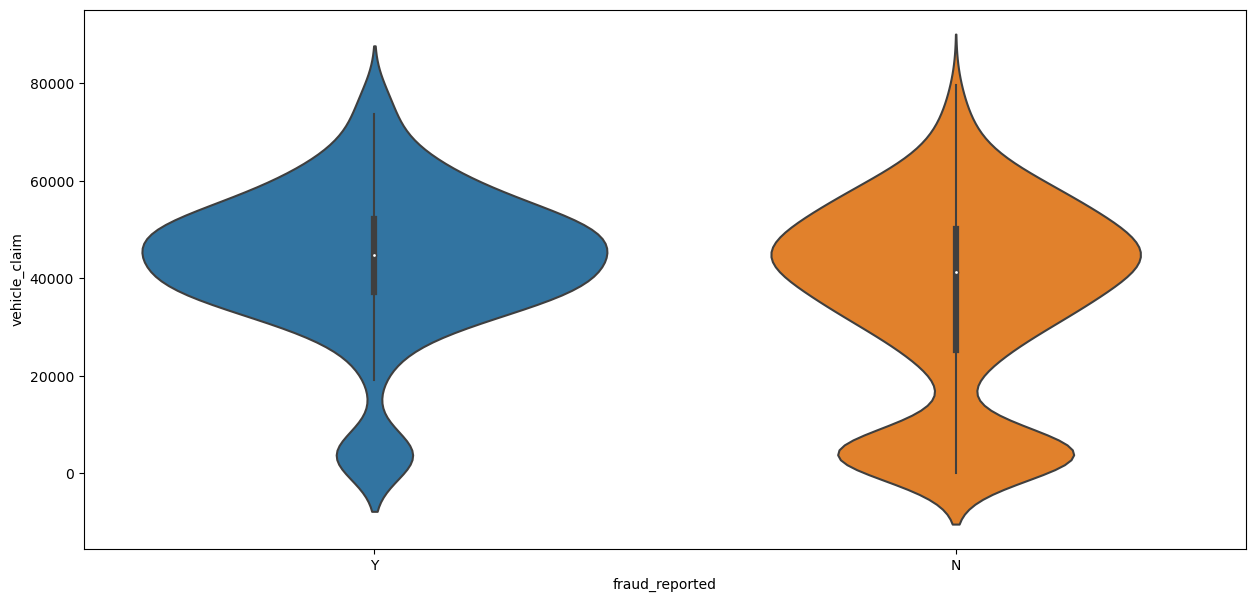

In [76]:
plt.figure(figsize=(15, 7))
sns.violinplot(y='vehicle_claim',x='fraud_reported',data=data)

In vehicle_claim most of the cx are between 100 to 6500. fraud report is higher in cx are between 3500 to 5500 vehicle_claim

<AxesSubplot:xlabel='fraud_reported', ylabel='property_claim'>

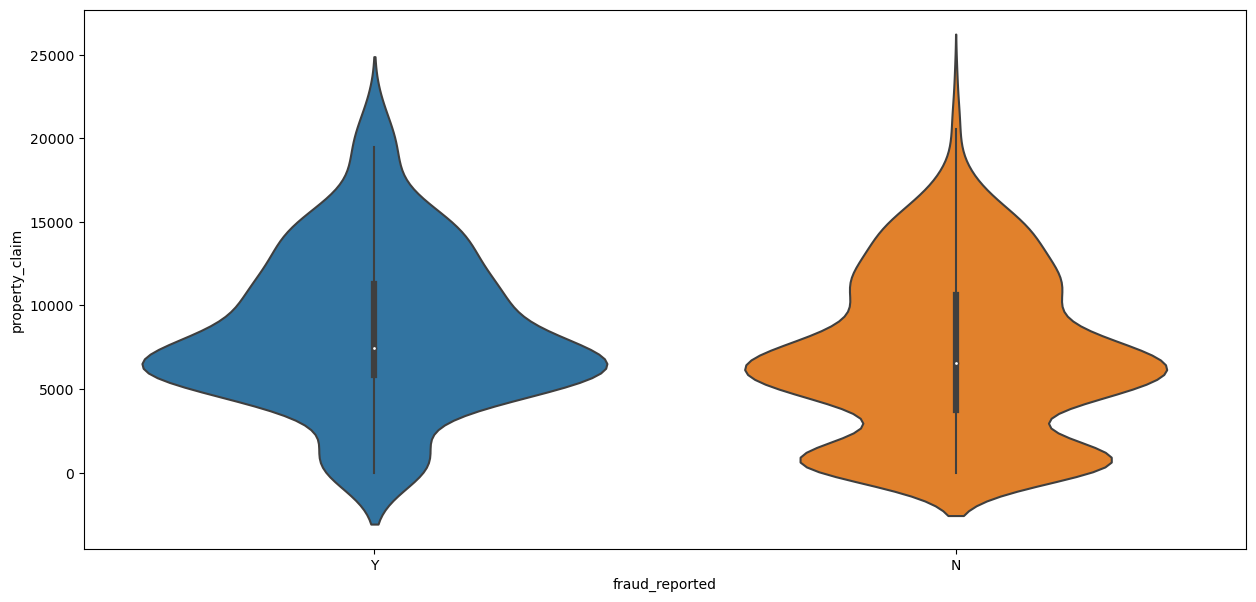

In [77]:
plt.figure(figsize=(15, 7))
sns.violinplot(y='property_claim',x='fraud_reported',data=data)

In Propery claim fraud reported is higher in cx claimed of 5000 to 8000

<AxesSubplot:xlabel='fraud_reported', ylabel='injury_claim'>

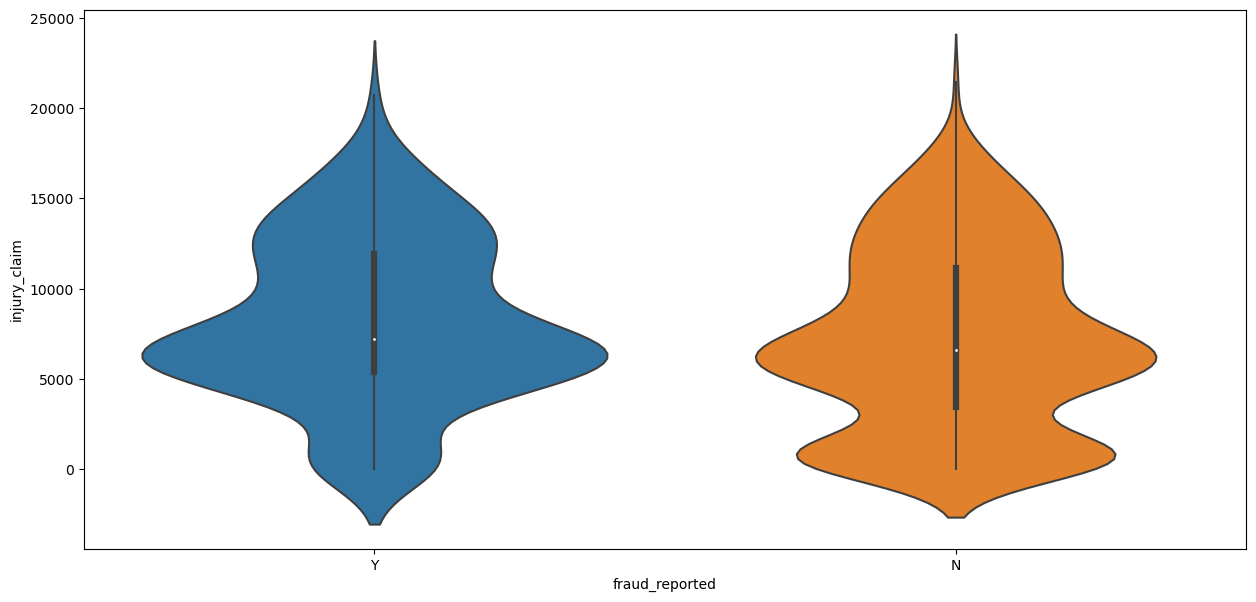

In [78]:
plt.figure(figsize=(15, 7))
sns.violinplot(y='injury_claim',x='fraud_reported',data=data)

most of the cx injury claim is 100 to 15000. most fraud reported cx are between 5000 to 8000 injury claim

<AxesSubplot:xlabel='insured_education_level', ylabel='count'>

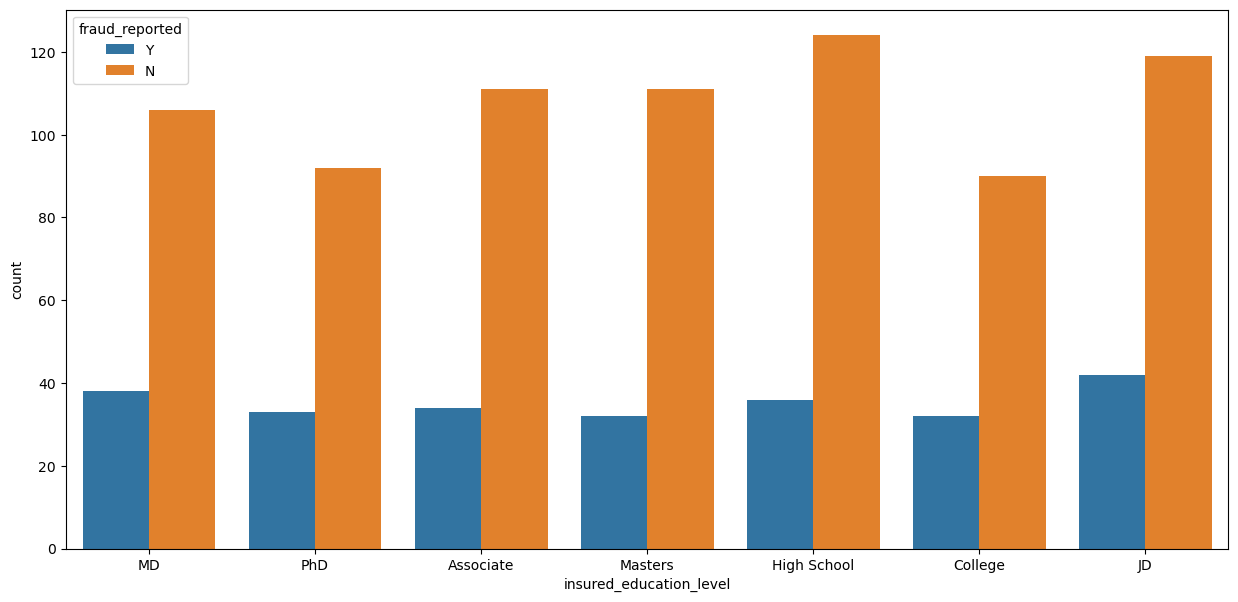

In [79]:
plt.figure(figsize=(15, 7))
sns.countplot(x='insured_education_level',hue='fraud_reported',data=data)

we higher cx those are education level is High School and least cx in PhD ad College

there is very little diffrence in fraud report in all kind of cx

fraued report is little higher in cx those education level is JD, MD, PhD, and College than others

<AxesSubplot:xlabel='insured_sex', ylabel='count'>

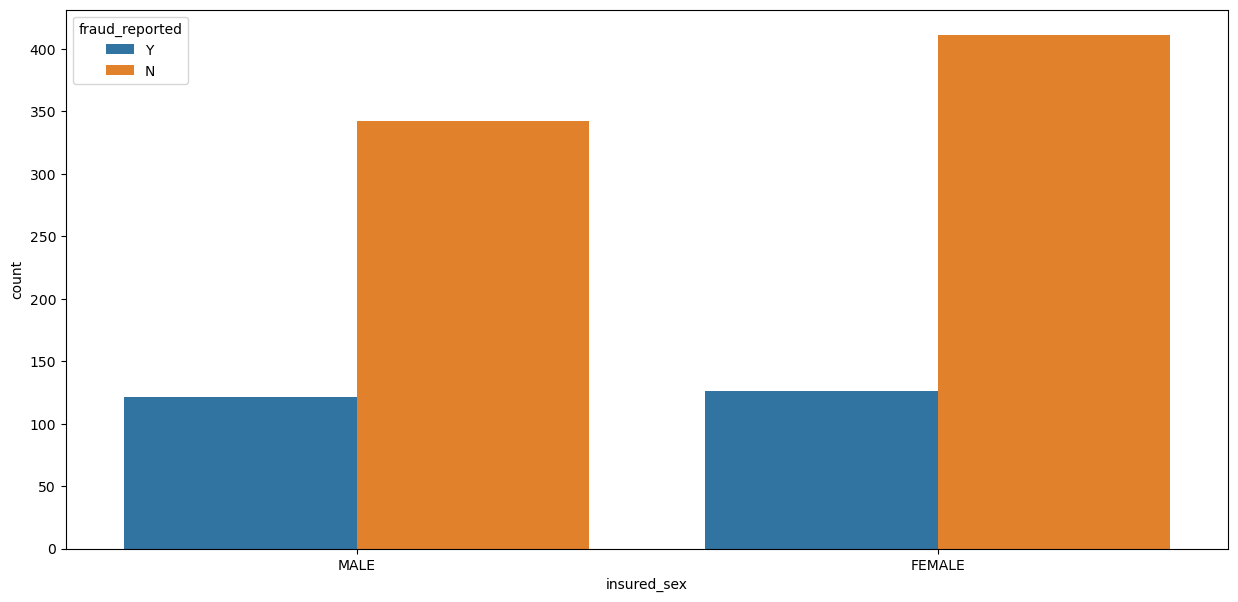

In [80]:
plt.figure(figsize=(15, 7))
sns.countplot(x='insured_sex',hue='fraud_reported',data=data)

we have more cx in Female than the Male. but fraud reported is little high Male cx

<AxesSubplot:xlabel='fraud_reported', ylabel='umbrella_limit'>

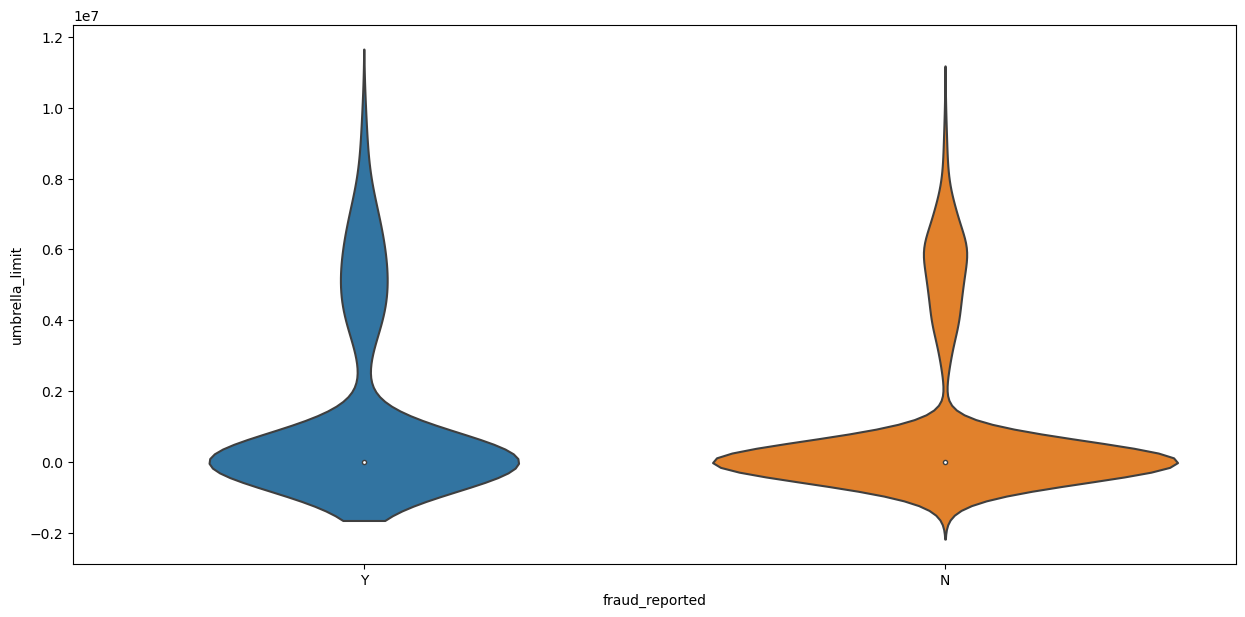

In [81]:
plt.figure(figsize=(15, 7))
sns.violinplot(x='fraud_reported',y='umbrella_limit',data= data )

most of cx we have their umbrella limit is 0. fraud reported is also high those cx

<AxesSubplot:xlabel='fraud_reported', ylabel='policy_annual_premium'>

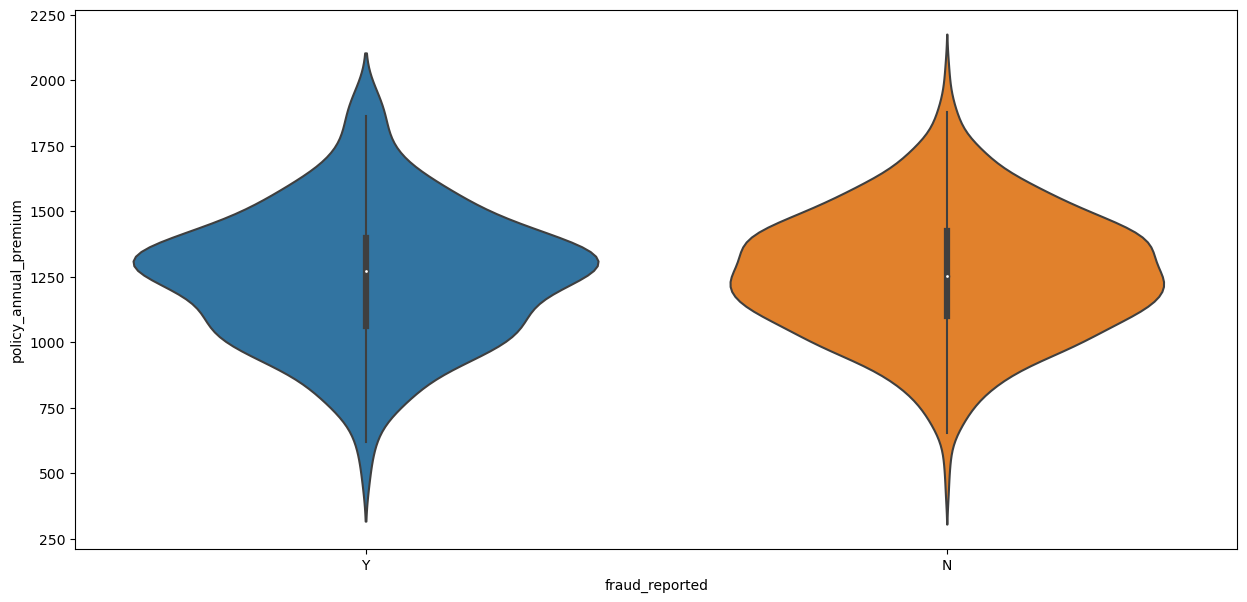

In [82]:
plt.figure(figsize=(15, 7))
sns.violinplot(x='fraud_reported',y='policy_annual_premium',data= data )

most of cx we have 1000 to 1500 of premium payers, most of the fraud reported we found in those premium is 1250 to 1300

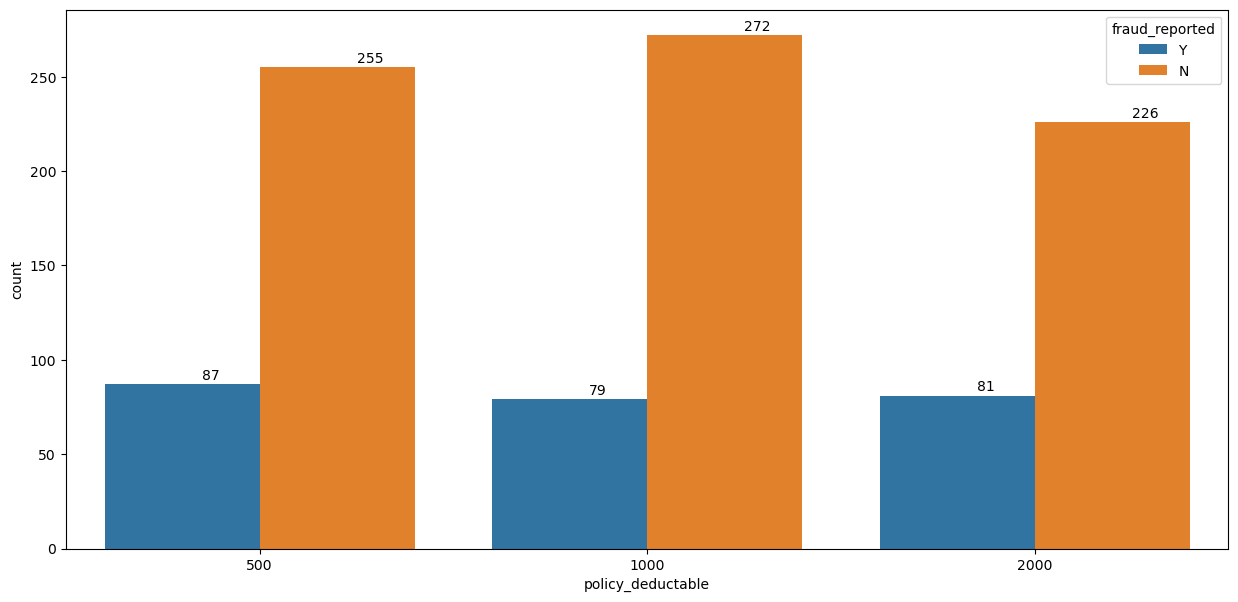

In [83]:
plt.figure(figsize=(15, 7))
ax=sns.countplot(x='policy_deductable',hue='fraud_reported',data= data )
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va='bottom',
                    color= 'black')

Here we notice here according to count fraud report high in cx of 2000 policy_deductable

<AxesSubplot:xlabel='policy_csl', ylabel='count'>

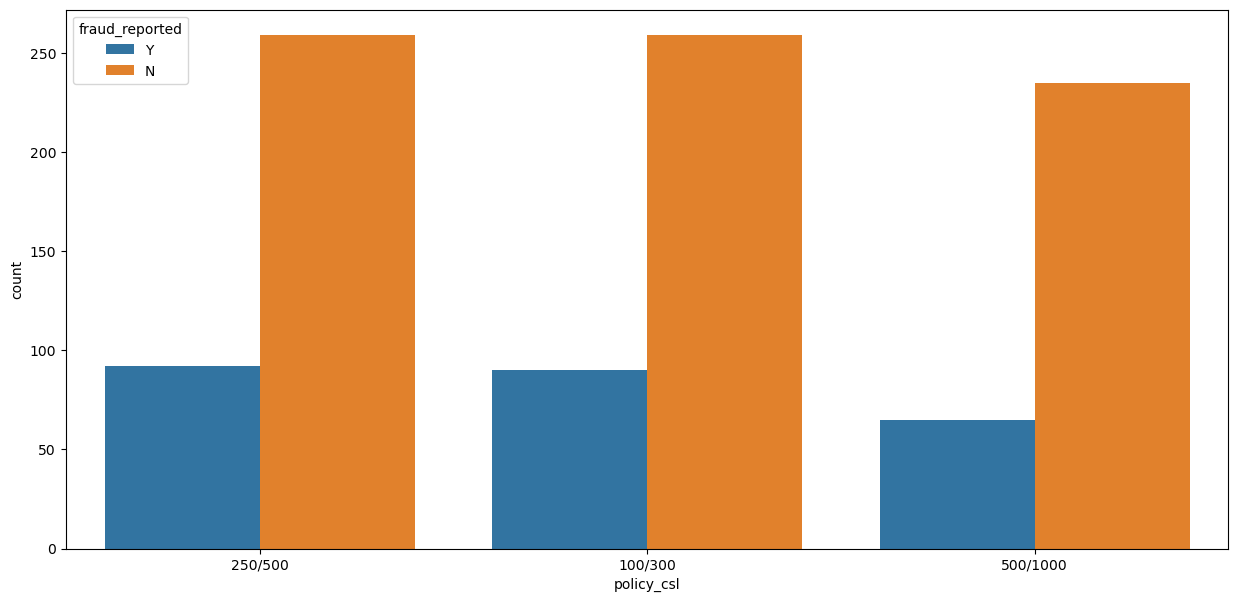

In [84]:
plt.figure(figsize=(15, 7))
sns.countplot(x='policy_csl',hue='fraud_reported',data= data )

In all three csl we same kind of similarty fraud report is also common in all policy_csl

<AxesSubplot:xlabel='policy_state', ylabel='count'>

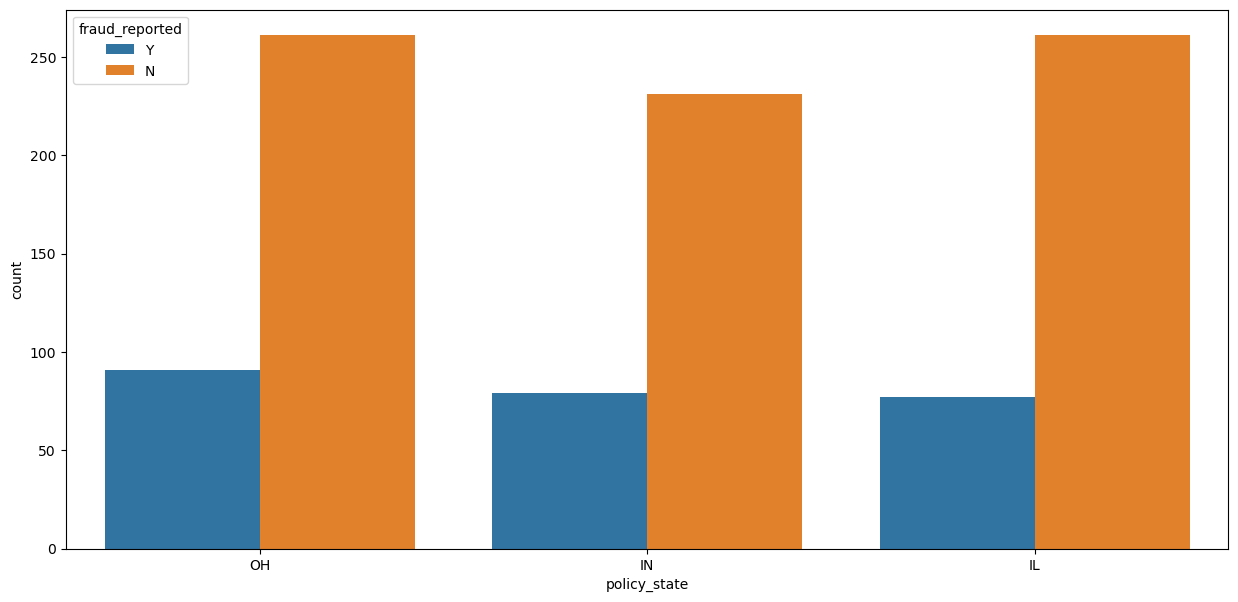

In [85]:
plt.figure(figsize=(15, 7))
sns.countplot(x='policy_state',hue='fraud_reported',data= data )


we have cx from three states and fraud report almost common in all three states

<AxesSubplot:xlabel='age', ylabel='count'>

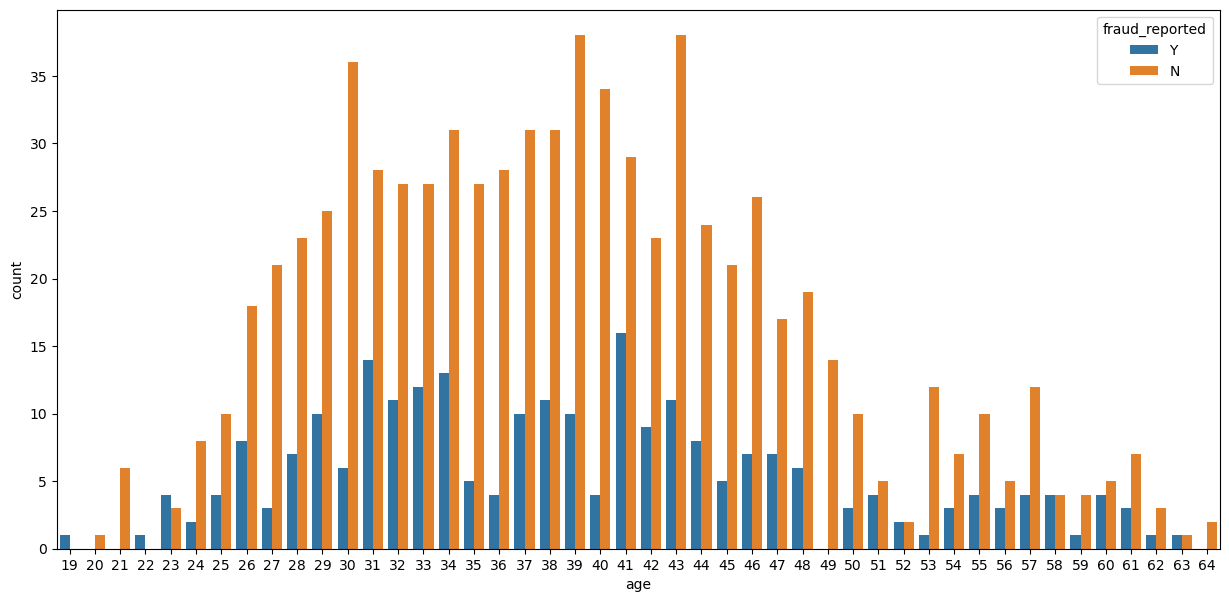

In [86]:
plt.figure(figsize=(15, 7))
sns.countplot(x='age',hue='fraud_reported',data= data )


We see most the cx are age of 26 to 50. fraud report is higher in cx 26 to 50 of age

<AxesSubplot:xlabel='fraud_reported', ylabel='months_as_customer'>

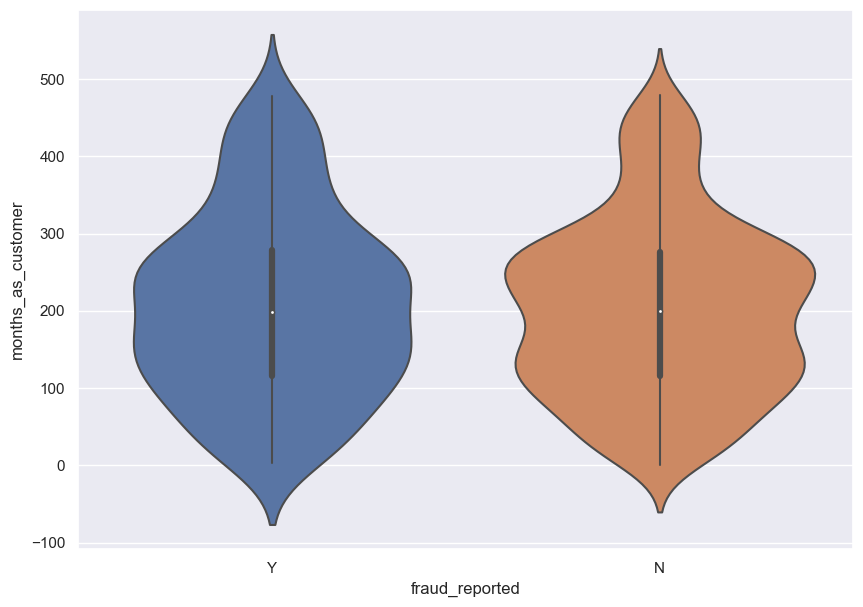

In [87]:
plt.figure(figsize=(10, 7))
sns. set(color_codes=True)
sns.violinplot(y='months_as_customer',x='fraud_reported',data= data )

most of the cx are 100 to 300 months old, We can notice here fraud report is high in cx between 100 to 250 months old

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25]),
 [Text(0, 0, '2014'),
  Text(1, 0, '2006'),
  Text(2, 0, '2000'),
  Text(3, 0, '1990'),
  Text(4, 0, '1997'),
  Text(5, 0, '2011'),
  Text(6, 0, '2002'),
  Text(7, 0, '1999'),
  Text(8, 0, '2012'),
  Text(9, 0, '1998'),
  Text(10, 0, '1992'),
  Text(11, 0, '2005'),
  Text(12, 0, '2004'),
  Text(13, 0, '1994'),
  Text(14, 0, '1991'),
  Text(15, 0, '1996'),
  Text(16, 0, '2013'),
  Text(17, 0, '2008'),
  Text(18, 0, '2003'),
  Text(19, 0, '2010'),
  Text(20, 0, '1993'),
  Text(21, 0, '1995'),
  Text(22, 0, '2007'),
  Text(23, 0, '2001'),
  Text(24, 0, '2009'),
  Text(25, 0, '2015')])

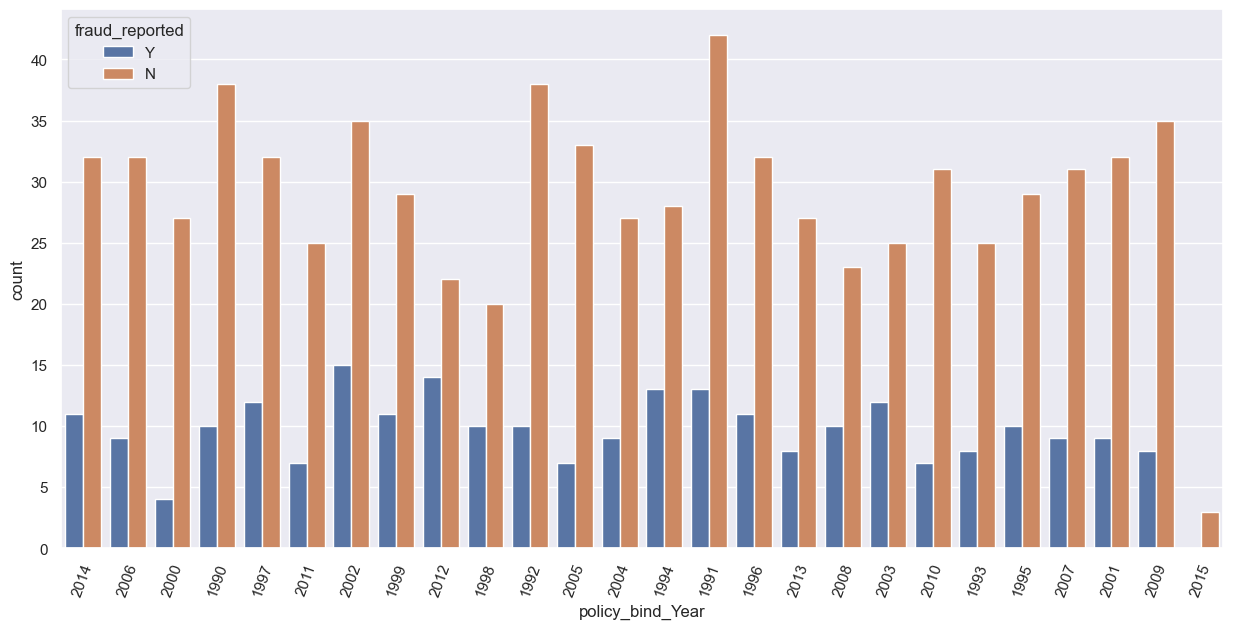

In [88]:
plt.figure(figsize=(15, 7))
sns.countplot(x='policy_bind_Year',hue='fraud_reported',data=data)
plt.xticks(rotation = 70,)

here we notice fraud report is high in policy_bind_year of 2014,2006,1990,1997,2002,1999,2012, 1998,1994,2008,2003 and etc than others

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]),
 [Text(0, 0, '1995'),
  Text(1, 0, '1996'),
  Text(2, 0, '1997'),
  Text(3, 0, '1998'),
  Text(4, 0, '1999'),
  Text(5, 0, '2000'),
  Text(6, 0, '2001'),
  Text(7, 0, '2002'),
  Text(8, 0, '2003'),
  Text(9, 0, '2004'),
  Text(10, 0, '2005'),
  Text(11, 0, '2006'),
  Text(12, 0, '2007'),
  Text(13, 0, '2008'),
  Text(14, 0, '2009'),
  Text(15, 0, '2010'),
  Text(16, 0, '2011'),
  Text(17, 0, '2012'),
  Text(18, 0, '2013'),
  Text(19, 0, '2014'),
  Text(20, 0, '2015')])

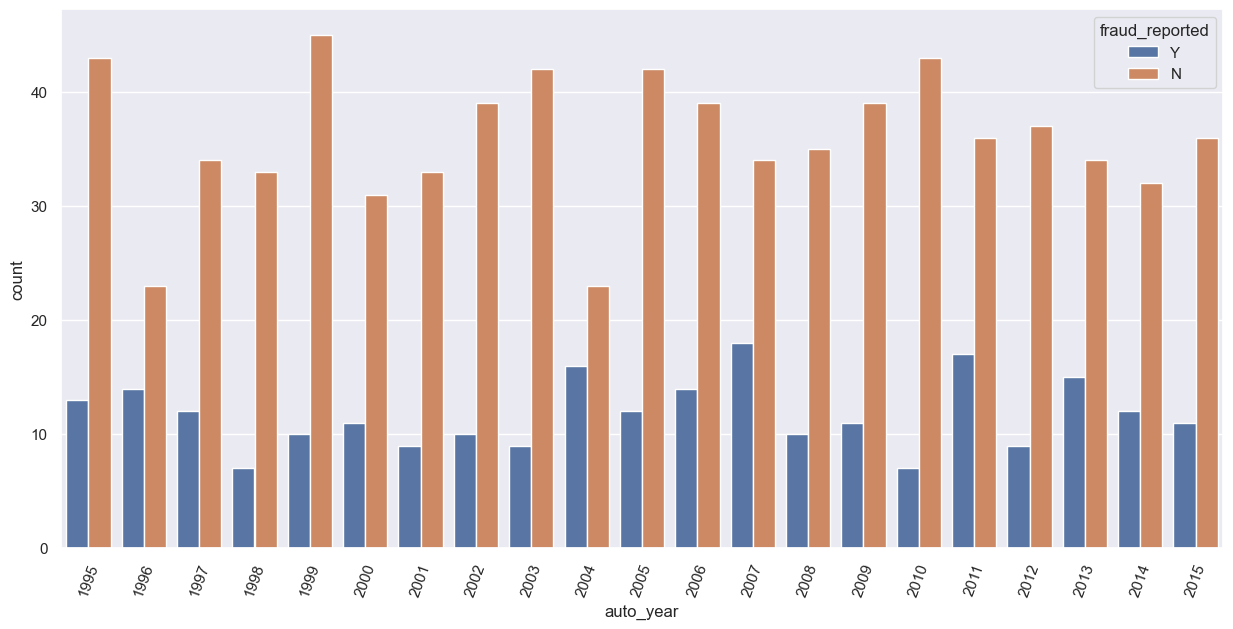

In [89]:
plt.figure(figsize=(15, 7))
sns.countplot(x='auto_year',hue='fraud_reported',data=data)
plt.xticks(rotation = 70,)

we can notice we have less vehicle from 1996 and 2004 auto year, according to vehice count fraud reported is higher in vehicle of 1996, 2004 , 2007, 2011, 2013, 2014 and etc auto year than others

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38]),
 [Text(0, 0, '92x'),
  Text(1, 0, 'E400'),
  Text(2, 0, 'RAM'),
  Text(3, 0, 'Tahoe'),
  Text(4, 0, 'RSX'),
  Text(5, 0, '95'),
  Text(6, 0, 'Pathfinder'),
  Text(7, 0, 'A5'),
  Text(8, 0, 'Camry'),
  Text(9, 0, 'F150'),
  Text(10, 0, 'A3'),
  Text(11, 0, 'Highlander'),
  Text(12, 0, 'Neon'),
  Text(13, 0, 'MDX'),
  Text(14, 0, 'Maxima'),
  Text(15, 0, 'Legacy'),
  Text(16, 0, 'TL'),
  Text(17, 0, 'Impreza'),
  Text(18, 0, 'Forrestor'),
  Text(19, 0, 'Escape'),
  Text(20, 0, 'Corolla'),
  Text(21, 0, '3 Series'),
  Text(22, 0, 'C300'),
  Text(23, 0, 'Wrangler'),
  Text(24, 0, 'M5'),
  Text(25, 0, 'X5'),
  Text(26, 0, 'Civic'),
  Text(27, 0, 'Passat'),
  Text(28, 0, 'Silverado'),
  Text(29, 0, 'CRV'),
  Text(30, 0, '93'),
  Text(31, 0, 'Accord'),
  Text(32, 0, 'X6'),
  Text(33, 0, 'Malibu'),
  Text(34, 0, 'F

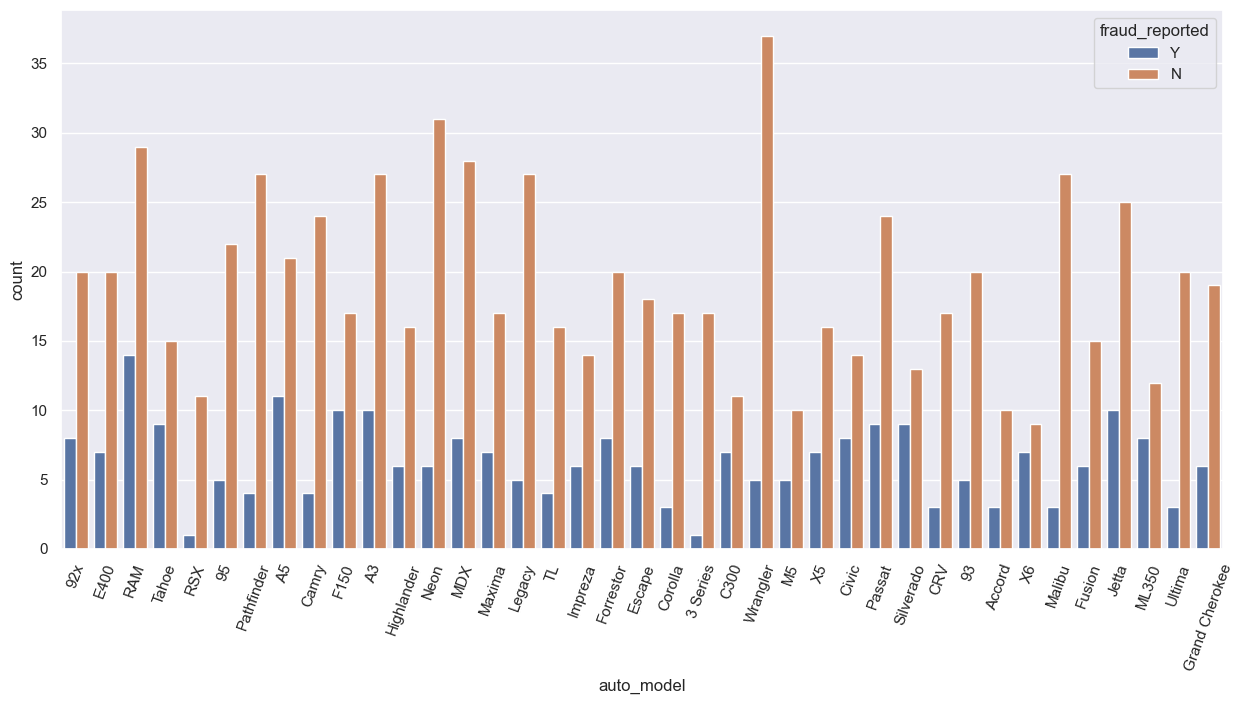

In [90]:
plt.figure(figsize=(15, 7))
sns.countplot(x='auto_model',hue='fraud_reported',data=data)
plt.xticks(rotation = 70,)

most of auto_model we see in Wrangler, RAM, Pathfinder, Neon and etc. we can notice Fraud report is higher in 92x, RAM, E400, Tahore, A5, F150, X5, C300, M5, CIVIC, SILVERADOX6 ML300 AND ETC atuo_models

<AxesSubplot:xlabel='auto_make', ylabel='count'>

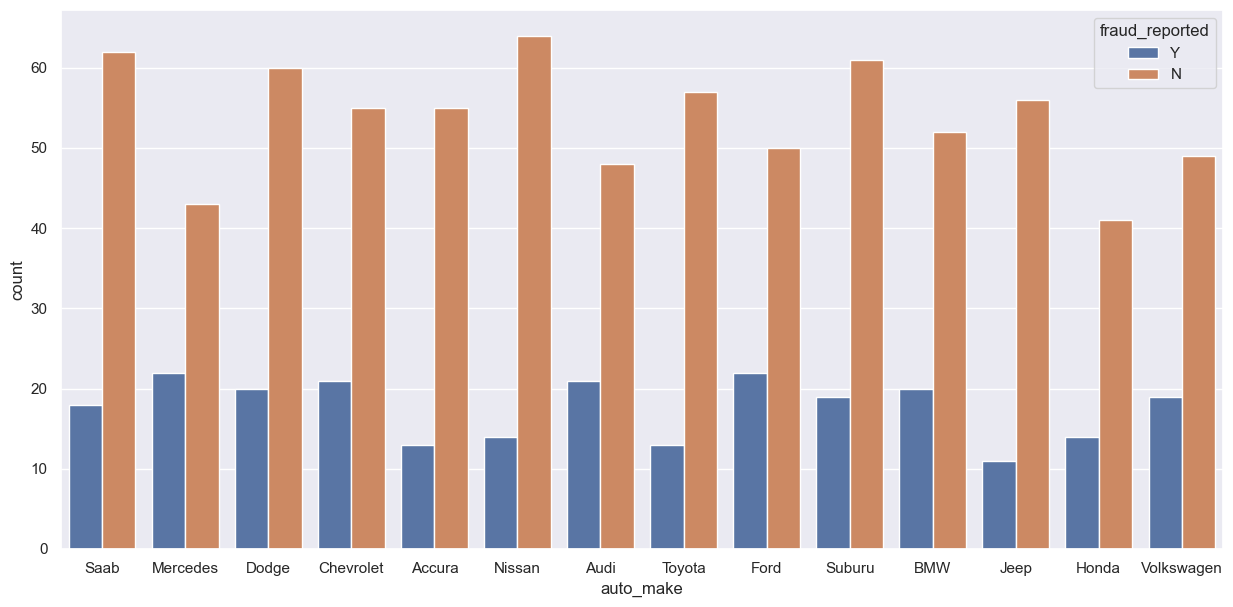

In [91]:
plt.figure(figsize=(15, 7))
sns.countplot(x='auto_make',hue='fraud_reported',data=data)

Have done the analysis of all important features, some of features don't have much information to define

# Skewness handling

# Skew and outliers will be handel in numerical numerical columns only

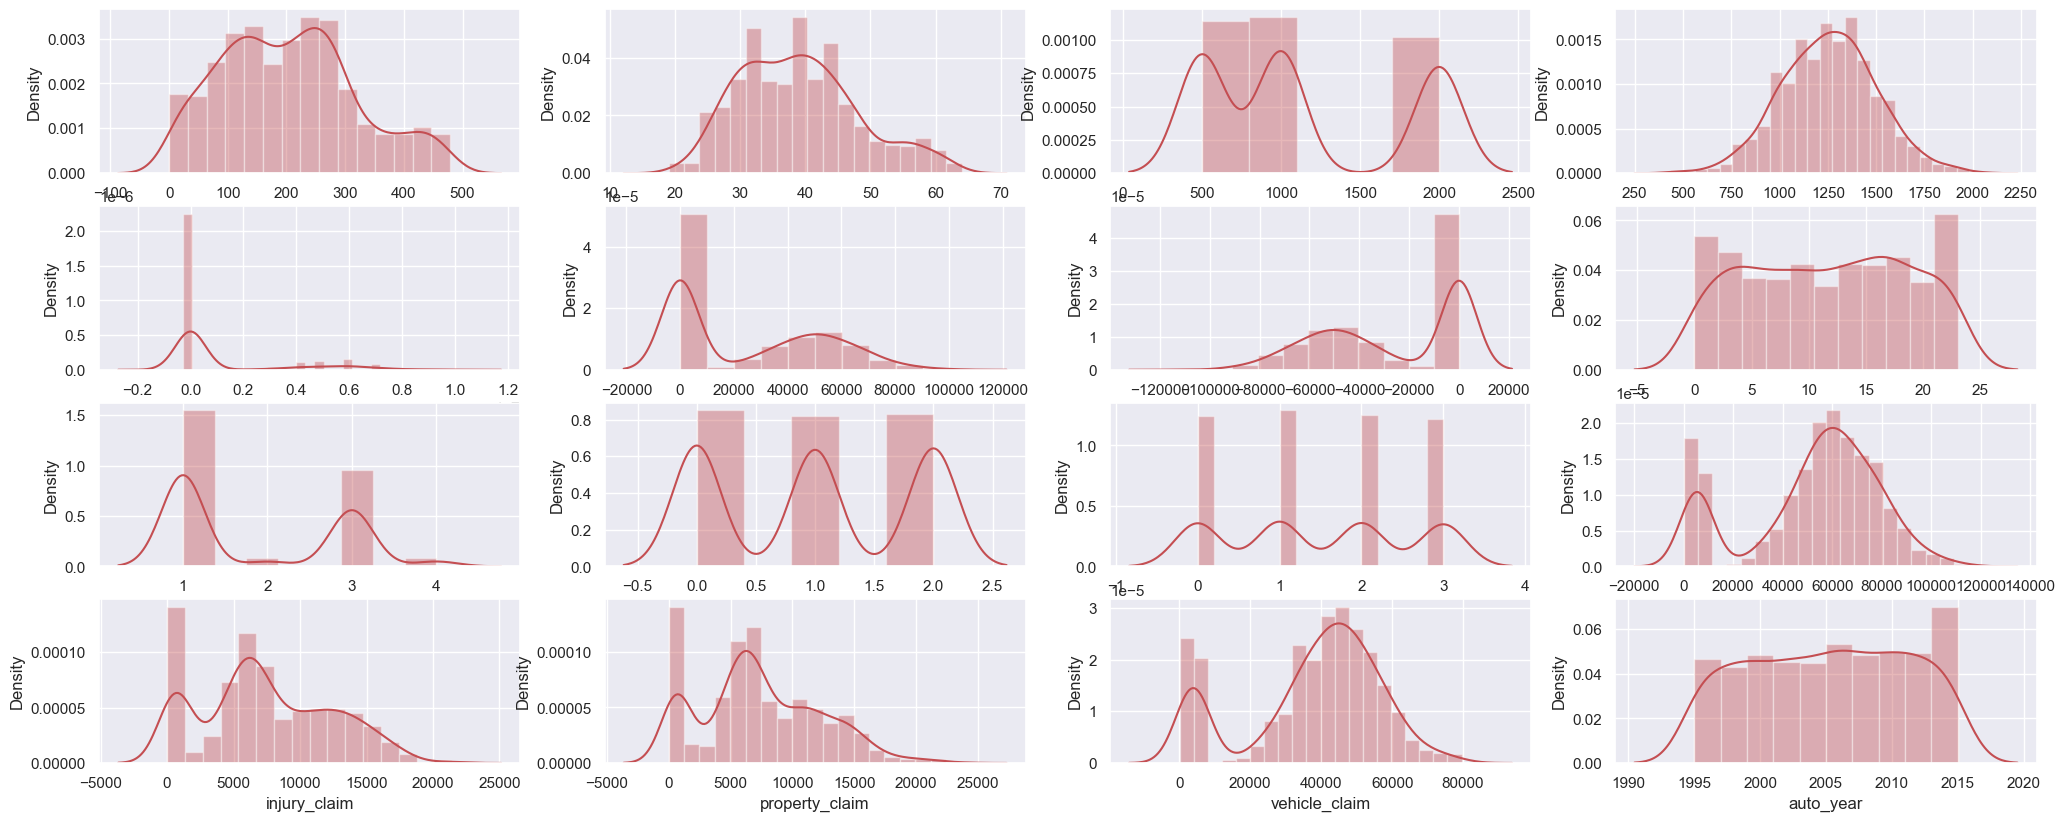

In [93]:
# ploting for numerical columns only
plt.figure(figsize=(25,20))
for i in enumerate(data.select_dtypes(include=['int64', 'float','int32'])):
    plt.subplot(8,4,i[0]+1)
    sns.distplot(data[i[1]],color='r')

In [95]:
data.select_dtypes(include=['int64', 'float','int32']).skew()

months_as_customer             0.362177
age                            0.478988
policy_deductable              0.477887
policy_annual_premium          0.004402
umbrella_limit                 1.806712
capital-gains                  0.478850
capital-loss                  -0.391472
incident_hour_of_the_day      -0.035584
number_of_vehicles_involved    0.502664
bodily_injuries                0.014777
witnesses                      0.019636
total_claim_amount            -0.594582
injury_claim                   0.264811
property_claim                 0.378169
vehicle_claim                 -0.621098
auto_year                     -0.048289
dtype: float64

skewness more than+/- 0.5 will we treated

object and target variable columns will no be treated

we can see here most of the columns are skewed

will only deal with numercal columns umbrella_limit, total_claim_amount, vehicle_claim

In [96]:
from sklearn.preprocessing import power_transform

data[['umbrella_limit','total_claim_amount','vehicle_claim']]=power_transform(
    data[['umbrella_limit','total_claim_amount','vehicle_claim']],method='yeo-johnson')


# Outliers Handling

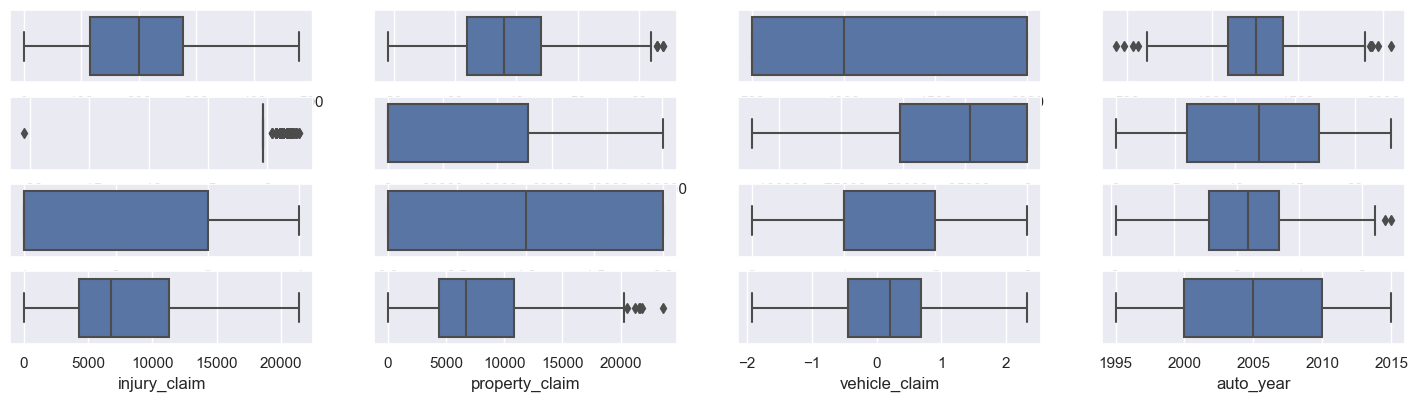

In [98]:
plt.figure(figsize=(18,10))
for o in enumerate(data.select_dtypes(include=['int64', 'float','int32'])):
    plt.subplot(9,4,o[0]+1)
    sns.boxplot(data[o[1]])

# Only some of columns seems having outliers after skewness removed

# outliers removal

# zscore

In [100]:
from scipy.stats import zscore

z=np.abs(zscore(data.select_dtypes(include=['int64', 'float','int32'])))

print(np.where(z>3))

(array([229, 248, 290, 500, 763, 807], dtype=int64), array([ 3,  3,  4, 13,  3,  6], dtype=int64))


In [101]:
df_1=data[(z<3).all(axis=1)]
print("with outliers::",data.shape)
print("After removing outliers::",df_1.shape)

with outliers:: (1000, 40)
After removing outliers:: (994, 40)


Zscore removing all rows from data

# IQR

In [103]:
from scipy import stats 
IQR = stats.iqr(data.select_dtypes(include=['int64', 'float','int32'])) 
IQR

1230.8708791143201

In [106]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
df_out = data.select_dtypes(include=['int64', 'float','int32'])[~((data.select_dtypes(include=['int64', 'float','int32']) < (Q1 - 1.5 * IQR)) |(data.select_dtypes(include=['int64', 'float','int32']) > (Q3 + 1.5 * IQR))).any(axis=1)]
print(df_out.shape)

(313, 16)


# choosing ZSCORE because there is huge dataloss in IQR

In [107]:
df=df_1

# Using LabelEncoder for convering categorical to numerical`

In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 994 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           994 non-null    int64  
 1   age                          994 non-null    int64  
 2   policy_state                 994 non-null    object 
 3   policy_csl                   994 non-null    object 
 4   policy_deductable            994 non-null    int64  
 5   policy_annual_premium        994 non-null    float64
 6   umbrella_limit               994 non-null    float64
 7   insured_sex                  994 non-null    object 
 8   insured_education_level      994 non-null    object 
 9   insured_occupation           994 non-null    object 
 10  insured_hobbies              994 non-null    object 
 11  insured_relationship         994 non-null    object 
 12  capital-gains                994 non-null    int64  
 13  capital-loss        

In [109]:
from sklearn.preprocessing import LabelEncoder

In [110]:
#Encoding object columns into Numeric Values in df
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
categ_data = df.select_dtypes(exclude=['int64', 'float','int32'])
for val in categ_data:
    df[val]=le.fit_transform(df[val].astype(str))

In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 994 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           994 non-null    int64  
 1   age                          994 non-null    int64  
 2   policy_state                 994 non-null    int32  
 3   policy_csl                   994 non-null    int32  
 4   policy_deductable            994 non-null    int64  
 5   policy_annual_premium        994 non-null    float64
 6   umbrella_limit               994 non-null    float64
 7   insured_sex                  994 non-null    int32  
 8   insured_education_level      994 non-null    int32  
 9   insured_occupation           994 non-null    int32  
 10  insured_hobbies              994 non-null    int32  
 11  insured_relationship         994 non-null    int32  
 12  capital-gains                994 non-null    int64  
 13  capital-loss        

# Dividing data into X and Y

In [112]:
x=df.drop(['fraud_reported'],axis=1)
y=df['fraud_reported']

# scaling X values

In [113]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()
x=sc.fit_transform(x)

In [114]:
pd.DataFrame(x).isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    0
31    0
32    0
33    0
34    0
35    0
36    0
37    0
38    0
dtype: int64

In [115]:
pd.DataFrame(x).describe()

,0,1,2,3,4,5,6,7,8,9,...,29,30,31,32,33,34,35,36,37,38
count,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,...,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000
mean,0.426698,0.443975,0.507042,0.474849,0.424883,0.502476,0.120736,0.463783,0.494634,0.512692,...,0.337963,0.452749,0.504179,0.508790,0.505785,0.467270,0.248994,0.480751,0.506585,0.463380
std,0.240313,0.203319,0.415523,0.402499,0.408046,0.168078,0.247854,0.498938,0.324961,0.309271,...,0.219722,0.235056,0.310061,0.293301,0.300326,0.288265,0.261924,0.293300,0.318378,0.294742
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.242171,0.288889,0.000000,0.000000,0.000000,0.385783,0.000000,0.000000,0.166667,0.230769,...,0.203347,0.349244,0.230769,0.263158,0.250000,0.233333,0.000000,0.233333,0.181818,0.200000
50%,0.417537,0.422222,0.500000,0.500000,0.333333,0.502305,0.000000,0.000000,0.500000,0.538462,...,0.308803,0.500086,0.538462,0.526316,0.500000,0.466667,0.000000,0.483333,0.545455,0.480000
75%,0.577766,0.572222,1.000000,1.000000,1.000000,0.613049,0.000000,1.000000,0.833333,0.769231,...,0.497707,0.613166,0.769231,0.763158,0.750000,0.700000,0.500000,0.733333,0.818182,0.720000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Imbalanced learn

Using OverSamling_BorderlineSMOTE

<AxesSubplot:xlabel='fraud_reported', ylabel='count'>

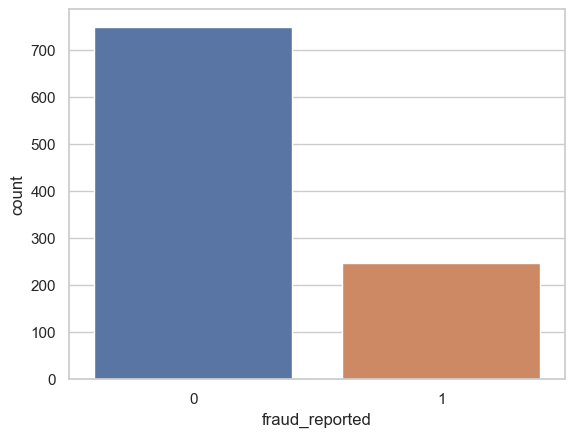

In [116]:
sns.set_style("whitegrid")
sns.countplot(x="fraud_reported", data=df)

In [117]:
from imblearn.over_sampling import BorderlineSMOTE
x_rus, y_rus =BorderlineSMOTE().fit_resample(x, y)
print('original  Target dataset shape:',y.shape)
print('Resample Target dataset shape',y_rus.shape)

original  Target dataset shape: (994,)
Resample Target dataset shape (1496,)


<AxesSubplot:xlabel='fraud_reported', ylabel='count'>

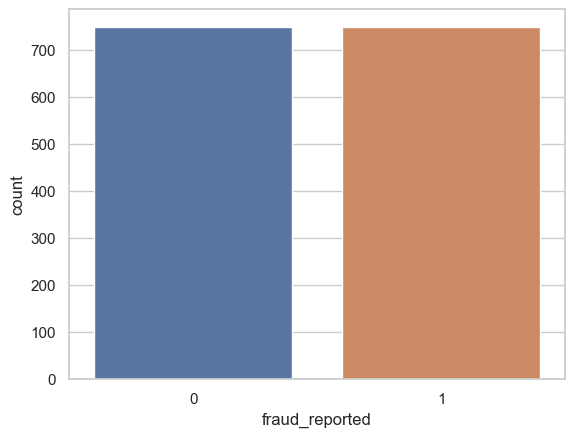

In [118]:
sns.set_style("whitegrid")
sns.countplot(y_rus)

Now we have balaced data for model training

# Spliting Train and Test data

In [119]:
from sklearn.model_selection import train_test_split

# MODEL BUILDING:

In [120]:
#Importing necessary libraries

from sklearn.linear_model import LogisticRegression

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

import warnings
from sklearn.model_selection import cross_val_score
warnings.filterwarnings('ignore')

# LogisticRegression

In [122]:
# finding Best Random state
maxAccu=0
maxRS=0

for i in range(1, 1000):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=i)
    lr=LogisticRegression()
    lr.fit(x_train, y_train)
    pred = lr.predict(x_test)
    accuracy = accuracy_score(y_test, pred)
    
    if accuracy>maxAccu:
        maxAccu=accuracy
        maxRS=i

print("Best Accuracy score is", maxAccu,"on Random State", maxRS)

Best Accuracy score is 0.8542713567839196 on Random State 75


In [124]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=75)

In [125]:
lr = LogisticRegression()
lr.fit(x_train,y_train)

y_pred = lr.predict(x_test)
accuracy_score(y_test,y_pred)

0.8542713567839196

# Cross - validation for logistic Regression

In [126]:
from sklearn.model_selection import cross_val_score

In [127]:
pred_lr = lr.predict(x_test)
accu = accuracy_score(y_test,pred_lr)

In [129]:
for j in range(22,30):
    cross = cross_val_score(lr,x,y,cv=j)
    lsc = cross.mean()
    print("At cv:-",j)
    print('Cross validation score is:-',lsc*100)
    print('accuracy_score is:-',accu*100)
    print('\n')

At cv:- 22
Cross validation score is:- 76.95652173913045
accuracy_score is:- 85.42713567839196


At cv:- 23
Cross validation score is:- 76.96019854766064
accuracy_score is:- 85.42713567839196


At cv:- 24
Cross validation score is:- 77.46322106078203
accuracy_score is:- 85.42713567839196


At cv:- 25
Cross validation score is:- 76.56923076923078
accuracy_score is:- 85.42713567839196


At cv:- 26
Cross validation score is:- 76.86338627634174
accuracy_score is:- 85.42713567839196


At cv:- 27
Cross validation score is:- 77.0603937270604
accuracy_score is:- 85.42713567839196


At cv:- 28
Cross validation score is:- 76.7715419501134
accuracy_score is:- 85.42713567839196


At cv:- 29
Cross validation score is:- 76.96319907273252
accuracy_score is:- 85.42713567839196




In [132]:
lsscore_selected = cross_val_score(lr,x,y,cv=29).mean()
print("The cv score is: ",lsscore_selected,"\nThe accuracy score is: ",accu)

The cv score is:  0.7696319907273252 
The accuracy score is:  0.8542713567839196


In [133]:
def metric_score(clf, x_train,x_test,y_train,y_test, train=True):
    if train:
        
        y_pred = clf.predict(x_train)

        print("\n========================== Train Result=============================")

        print(f"Accuracy Score: {accuracy_score(y_train, y_pred) * 100:.2f}%")

    
    elif train==False:
        pred = clf.predict(x_test)
        
        print("\n==========================Test Result=======================")
        print(f"Accuracy Score: {accuracy_score(y_test,pred) * 100:.2f}%")
        
        print("\n \n Test Classification Report \n", classification_report(y_test, pred, digits=2))
        
        print('\n Confusion Matrix: \n',confusion_matrix(y_test,pred))

In [134]:
# finding Best Random state
maxAccu=0
maxRS=0

for i in range(172, 175):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=i)
    rf=RandomForestClassifier()
    rf.fit(x_train, y_train)
    pred = rf.predict(x_test)
    accuracy = accuracy_score(y_test, pred)
    
    if accuracy>maxAccu:
        maxAccu=accuracy
        maxRS=i

print("Best Accuracy score is", maxAccu,"on Random State", maxRS)

Best Accuracy score is 0.7889447236180904 on Random State 173


In [135]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=173)

In [136]:
rf = RandomForestClassifier()
rf.fit(x_train,y_train)

metric_score(rf,x_train,x_test,y_train, y_test, train=True)

metric_score(rf,x_train,x_test,y_train, y_test, train=False)


========================== Train Result=============================
Accuracy Score: 100.00%

==========================Test Result=======================
Accuracy Score: 80.90%

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       0.85      0.92      0.89       160
           1       0.52      0.36      0.42        39

    accuracy                           0.81       199
   macro avg       0.69      0.64      0.65       199
weighted avg       0.79      0.81      0.80       199


 Confusion Matrix: 
 [[147  13]
 [ 25  14]]


# Cross - Validation for Random Forest classifier

In [137]:
pred_rf = rf.predict(x_test)
accu = accuracy_score(y_test,pred_rf)

In [138]:
for j in range(20,30):
    cross = cross_val_score(rf,x,y,cv=j)
    lsc = cross.mean()
    print("At cv:-",j)
    print('Cross validation score is:-',lsc*100)
    print('accuracy_score is:-',accu*100)
    print('\n')

At cv:- 20
Cross validation score is:- 77.48163265306124
accuracy_score is:- 80.90452261306532


At cv:- 21
Cross validation score is:- 75.25540357987165
accuracy_score is:- 80.90452261306532


At cv:- 22
Cross validation score is:- 77.96442687747036
accuracy_score is:- 80.90452261306532


At cv:- 23
Cross validation score is:- 77.87250666421546
accuracy_score is:- 80.90452261306532


At cv:- 24
Cross validation score is:- 76.86556329849013
accuracy_score is:- 80.90452261306532


At cv:- 25
Cross validation score is:- 76.18717948717949
accuracy_score is:- 80.90452261306532


At cv:- 26
Cross validation score is:- 76.87117201287242
accuracy_score is:- 80.90452261306532


At cv:- 27
Cross validation score is:- 76.66555444333221
accuracy_score is:- 80.90452261306532


At cv:- 28
Cross validation score is:- 76.8792517006803
accuracy_score is:- 80.90452261306532


At cv:- 29
Cross validation score is:- 77.17473196175021
accuracy_score is:- 80.90452261306532




In [139]:
lsscore_selected = cross_val_score(rf,x,y,cv=29).mean()
print("The cv score is: ",lsscore_selected,"\nThe accuracy score is: ",accu)

The cv score is:  0.786815415821501 
The accuracy score is:  0.8090452261306532


# Gradient Boosting Classifier

In [150]:
# finding Best Random state
maxAccu=0
maxRS=0

for i in range(800, 900):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=i)
    gbc=GradientBoostingClassifier()
    gbc.fit(x_train, y_train)
    pred = gbc.predict(x_test)
    accuracy = accuracy_score(y_test, pred)
    
    if accuracy>maxAccu:
        maxAccu=accuracy
        maxRS=i

print("Best Accuracy score is", maxAccu,"on Random State", maxRS)

Best Accuracy score is 0.8743718592964824 on Random State 817


In [183]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=817)

In [152]:
gbc= GradientBoostingClassifier()
gbc.fit(x_train,y_train)

metric_score(gbc,x_train,x_test,y_train, y_test, train=True)

metric_score(gbc,x_train,x_test,y_train, y_test, train=False)


========================== Train Result=============================
Accuracy Score: 97.61%

==========================Test Result=======================
Accuracy Score: 87.44%

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       0.92      0.92      0.92       154
           1       0.73      0.71      0.72        45

    accuracy                           0.87       199
   macro avg       0.82      0.82      0.82       199
weighted avg       0.87      0.87      0.87       199


 Confusion Matrix: 
 [[142  12]
 [ 13  32]]


# Cross - Validation for Gradient Boost

In [153]:
pred_gbc = gbc.predict(x_test)
accu = accuracy_score(y_test,pred_gbc)

In [144]:
for j in range(4,10):
    cross = cross_val_score(gbc,x,y,cv=j)
    lsc = cross.mean()
    print("At cv:-",j)
    print('Cross validation score is:-',lsc*100)
    print('accuracy_score is:-',accu*100)
    print('\n')

At cv:- 4
Cross validation score is:- 81.89653776395906
accuracy_score is:- 82.6086956521739


At cv:- 5
Cross validation score is:- 81.69636059083295
accuracy_score is:- 82.6086956521739


At cv:- 6
Cross validation score is:- 81.29487647559937
accuracy_score is:- 82.6086956521739


At cv:- 7
Cross validation score is:- 81.69014084507042
accuracy_score is:- 82.6086956521739


At cv:- 8
Cross validation score is:- 80.98951612903225
accuracy_score is:- 82.6086956521739


At cv:- 9
Cross validation score is:- 82.30594230594231
accuracy_score is:- 82.6086956521739




In [154]:
lsscore_selected = cross_val_score(gbc,x,y,cv=9).mean()
print("The cv score is: ",lsscore_selected,"\nThe accuracy score is: ",accu)

The cv score is:  0.815051415051415 
The accuracy score is:  0.8743718592964824


# XGBOOST

In [146]:
from xgboost import XGBClassifier

In [155]:
# finding Best Random state
maxAccu=0
maxRS=0

for i in range(1,100 ):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=i)
    xgb=XGBClassifier()
    xgb.fit(x_train, y_train)
    pred = xgb.predict(x_test)
    accuracy = accuracy_score(y_test, pred)
    
    if accuracy>maxAccu:
        maxAccu=accuracy
        maxRS=i

print("Best Accuracy score is", maxAccu,"on Random State", maxRS)

Best Accuracy score is 0.8693467336683417 on Random State 78


In [159]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=78)

In [160]:
#import xgboost as xgb
xgb = XGBClassifier()

xgb.fit(x_train,y_train)

metric_score(xgb,x_train,x_test,y_train, y_test, train=True)

metric_score(xgb,x_train,x_test,y_train, y_test, train=False)


========================== Train Result=============================
Accuracy Score: 100.00%

==========================Test Result=======================
Accuracy Score: 86.93%

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       0.92      0.92      0.92       158
           1       0.68      0.68      0.68        41

    accuracy                           0.87       199
   macro avg       0.80      0.80      0.80       199
weighted avg       0.87      0.87      0.87       199


 Confusion Matrix: 
 [[145  13]
 [ 13  28]]


# Cross - Validation for XGBOOST

In [161]:
pred_xgb = xgb.predict(x_test)
accu = accuracy_score(y_test,pred_xgb)

In [162]:
for j in range(4,10):
    cross = cross_val_score(xgb,x,y,cv=j)
    lsc = cross.mean()
    print("At cv:-",j)
    print('Cross validation score is:-',lsc*100)
    print('accuracy_score is:-',accu*100)
    print('\n')

At cv:- 4
Cross validation score is:- 83.0001457442674
accuracy_score is:- 86.93467336683418


At cv:- 5
Cross validation score is:- 82.29480737018426
accuracy_score is:- 86.93467336683418


At cv:- 6
Cross validation score is:- 81.49446269928197
accuracy_score is:- 86.93467336683418


At cv:- 7
Cross validation score is:- 82.3943661971831
accuracy_score is:- 86.93467336683418


At cv:- 8
Cross validation score is:- 81.99516129032259
accuracy_score is:- 86.93467336683418


At cv:- 9
Cross validation score is:- 82.3004823004823
accuracy_score is:- 86.93467336683418




In [163]:
lsscore_selected = cross_val_score(xgb,x,y,cv=4).mean()
print("The cv score is: ",lsscore_selected,"\nThe accuracy score is: ",accu)

The cv score is:  0.830001457442674 
The accuracy score is:  0.8693467336683417


# SVC

In [164]:
from sklearn.svm import SVC

In [167]:
# finding Best Random state
maxAccu=0
maxRS=0

for i in range(1, 200):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=i)
    svc=SVC()
    svc.fit(x_train, y_train)
    pred = svc.predict(x_test)
    accuracy = accuracy_score(y_test, pred)
    
    if accuracy>maxAccu:
        maxAccu=accuracy
        maxRS=i

print("Best Accuracy score is", maxAccu,"on Random State", maxRS) 

Best Accuracy score is 0.8241206030150754 on Random State 75


In [168]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=75)

In [169]:
svc = SVC()
svc.fit(x_train,y_train)

metric_score(svc,x_train,x_test,y_train, y_test, train=True)

metric_score(svc,x_train,x_test,y_train, y_test, train=False)


========================== Train Result=============================
Accuracy Score: 83.52%

==========================Test Result=======================
Accuracy Score: 82.41%

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       0.83      0.99      0.90       163
           1       0.67      0.06      0.10        36

    accuracy                           0.82       199
   macro avg       0.75      0.52      0.50       199
weighted avg       0.80      0.82      0.76       199


 Confusion Matrix: 
 [[162   1]
 [ 34   2]]


# Cross - Validation for SVC

In [171]:
pred_svc = svc.predict(x_test)
accu = accuracy_score(y_test,pred_svc)

In [172]:
for j in range(22,30):
    cross = cross_val_score(svc,x,y,cv=j)
    lsc = cross.mean()
    print("At cv:-",j)
    print('Cross validation score is:-',lsc*100)
    print('accuracy_score is:-',accu*100)
    print('\n')

At cv:- 22
Cross validation score is:- 74.94949494949498
accuracy_score is:- 82.41206030150754


At cv:- 23
Cross validation score is:- 75.04825811195882
accuracy_score is:- 82.41206030150754


At cv:- 24
Cross validation score is:- 75.05807200929152
accuracy_score is:- 82.41206030150754


At cv:- 25
Cross validation score is:- 75.36666666666666
accuracy_score is:- 82.41206030150754


At cv:- 26
Cross validation score is:- 75.35295338939065
accuracy_score is:- 82.41206030150754


At cv:- 27
Cross validation score is:- 75.35869202535869
accuracy_score is:- 82.41206030150754


At cv:- 28
Cross validation score is:- 75.47335600907032
accuracy_score is:- 82.41206030150754


At cv:- 29
Cross validation score is:- 75.45928716314111
accuracy_score is:- 82.41206030150754




In [173]:
lsscore_selected = cross_val_score(svc,x,y,cv=28).mean()
print("The cv score is: ",lsscore_selected,"\nThe accuracy score is: ",accu)

The cv score is:  0.7547335600907031 
The accuracy score is:  0.8241206030150754


# KNN

In [175]:
from sklearn.neighbors import KNeighborsClassifier

In [177]:
# finding Best Random state
maxAccu=0
maxRS=0

for i in range(1, 235):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=i)
    knn=KNeighborsClassifier()
    knn.fit(x_train, y_train)
    pred = knn.predict(x_test)
    accuracy = accuracy_score(y_test, pred)
    
    if accuracy>maxAccu:
        maxAccu=accuracy
        maxRS=i

print("Best Accuracy score is", maxAccu,"on Random State", maxRS)

Best Accuracy score is 0.7889447236180904 on Random State 65


In [178]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=65)

In [179]:
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)

metric_score(knn,x_train,x_test,y_train, y_test, train=True)

metric_score(knn,x_train,x_test,y_train, y_test, train=False)


========================== Train Result=============================
Accuracy Score: 78.24%

==========================Test Result=======================
Accuracy Score: 78.89%

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       0.82      0.94      0.87       154
           1       0.57      0.29      0.38        45

    accuracy                           0.79       199
   macro avg       0.69      0.61      0.63       199
weighted avg       0.76      0.79      0.76       199


 Confusion Matrix: 
 [[144  10]
 [ 32  13]]


# Cross - Validation for KNN

In [180]:
pred_knn = knn.predict(x_test)
accu = accuracy_score(y_test,pred_knn)

In [181]:
for j in range(20,30):
    cross = cross_val_score(knn,x,y,cv=j)
    lsc = cross.mean()
    print("At cv:-",j)
    print('Cross validation score is:-',lsc*100)
    print('accuracy_score is:-',accu*100)
    print('\n')

At cv:- 20
Cross validation score is:- 71.83265306122448
accuracy_score is:- 78.89447236180904


At cv:- 21
Cross validation score is:- 71.42857142857143
accuracy_score is:- 78.89447236180904


At cv:- 22
Cross validation score is:- 71.52393500219587
accuracy_score is:- 78.89447236180904


At cv:- 23
Cross validation score is:- 71.82415663204338
accuracy_score is:- 78.89447236180904


At cv:- 24
Cross validation score is:- 71.83507549361208
accuracy_score is:- 78.89447236180904


At cv:- 25
Cross validation score is:- 71.43589743589745
accuracy_score is:- 78.89447236180904


At cv:- 26
Cross validation score is:- 71.62877608221737
accuracy_score is:- 78.89447236180904


At cv:- 27
Cross validation score is:- 71.72728283839396
accuracy_score is:- 78.89447236180904


At cv:- 28
Cross validation score is:- 71.33503401360545
accuracy_score is:- 78.89447236180904


At cv:- 29
Cross validation score is:- 71.42857142857144
accuracy_score is:- 78.89447236180904




In [182]:
lsscore_selected = cross_val_score(knn,x,y,cv=20).mean()
print("The cv score is: ",lsscore_selected,"\nThe accuracy score is: ",accu)

The cv score is:  0.7183265306122448 
The accuracy score is:  0.7889447236180904


# Selecting Best Model

We Select Gradient Boost Classifier for a hyperparameter tuning beacuse its gives us:

Accuracy Score -> 87


Cross Validation Score -> 81

In [184]:
gbc= GradientBoostingClassifier()
gbc.fit(x_train,y_train)

metric_score(gbc,x_train,x_test,y_train, y_test, train=True)

metric_score(gbc,x_train,x_test,y_train, y_test, train=False)


========================== Train Result=============================
Accuracy Score: 97.48%

==========================Test Result=======================
Accuracy Score: 85.93%

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       0.90      0.92      0.91       154
           1       0.71      0.64      0.67        45

    accuracy                           0.86       199
   macro avg       0.80      0.78      0.79       199
weighted avg       0.86      0.86      0.86       199


 Confusion Matrix: 
 [[142  12]
 [ 16  29]]


# Hyperparameter Tuning

In [185]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [189]:
param = {
    'max_depth': range(2,12),
    'loss':['log_loss', 'deviance'],
    'min_samples_split': range(2,16,2),
    
    'n_estimators':[150,300,450],
    'min_samples_leaf':[2,3,4,5,7,9]
}

In [190]:
gbc= GradientBoostingClassifier()

In [191]:
rt = RandomizedSearchCV(gbc,param_distributions = param)

rt.fit(x_train,y_train)
rt.best_params_

{'n_estimators': 300,
 'min_samples_split': 8,
 'min_samples_leaf': 9,
 'max_depth': 5,
 'loss': 'deviance'}

In [203]:
rt=GradientBoostingClassifier(n_estimators= 300,min_samples_split= 9,min_samples_leaf= 7,max_depth=6,loss='deviance')
rt.fit(x_train,y_train)

metric_score(rt,x_train,x_test,y_train, y_test, train=True)

metric_score(rt,x_train,x_test,y_train, y_test, train=False)


========================== Train Result=============================
Accuracy Score: 100.00%

==========================Test Result=======================
Accuracy Score: 86.93%

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       0.91      0.92      0.92       154
           1       0.72      0.69      0.70        45

    accuracy                           0.87       199
   macro avg       0.82      0.81      0.81       199
weighted avg       0.87      0.87      0.87       199


 Confusion Matrix: 
 [[142  12]
 [ 14  31]]


In [204]:
from sklearn import metrics

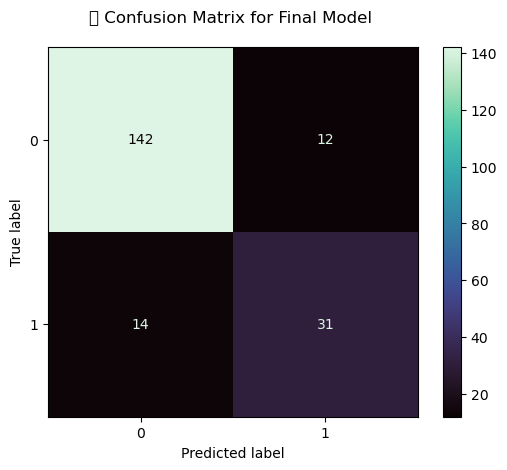

In [206]:
plt.style.use('default')
class_names = data.columns
metrics.plot_confusion_matrix(rt, x_test, y_test, cmap='mako')
plt.title('\t Confusion Matrix for Final Model \n')
plt.show()

# AUC ROC curve

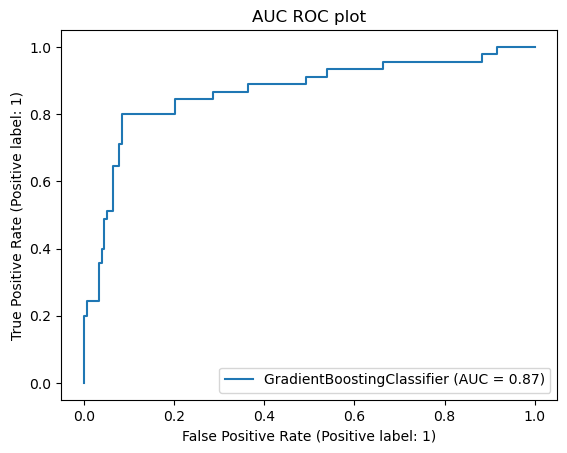

In [208]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(rt, x_test, y_test)
plt.title("AUC ROC plot")
plt.show()

# Saving the model in pickle Format

In [210]:
# pickeling or serialization of a file
import pickle
filename = 'Insurance Claims- Fraud Detection'
pickle.dump(rt, open(filename, 'wb'))

# Prediction Conclusion:

In [211]:
import numpy as np
ac=np.array(y_test)
predictedc=np.array(rt.predict(x_test))
df_comparisonc = pd.DataFrame({"original":ac,"predicted":predictedc},index= range(len(ac)))
df_comparisonc

,original,predicted
0,0,0
1,0,1
2,0,0
3,0,0
4,0,0
...,...,...
194,1,1
195,0,0
196,0,0
197,0,1


In [ ]:
#Student of DataScience
#Student of DataTrained- Saurav
#Date-27-12-22
#Time - 20:17